In [ ]:
# Librerias
import math
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from scipy.interpolate import CubicSpline
from scipy.integrate import solve_ivp

# Unidad #5_2 - Interpolacion y Ajuste de Curva

## Recordando Interpolacion Lagrange y Newton

In [ ]:
# Codigo Completo

def matNewtonFull(x, y, x_val):
  result = 0
  n = len(x)
  L = np.zeros((n, n), float)
  L[:, 0] = np.ones((1, n))
  for i in range(1, n):
    for j in range(i, n):
      pro = 1
      for k in range(0, i):
        pro = pro * (x[j] - x[k])
      L[j, i] = pro
  c = np.linalg.solve(L, y)
  for i in range(n):
    term = c[i]
    for j in range(i):
      term *= (x_val - x[j])
    result += term
  return c, x_val, result

Coeficientes del polinomio: [ 1.          2.         -1.          0.41666667] 
evaluado en x:  2 
con un resultado de:  3.0


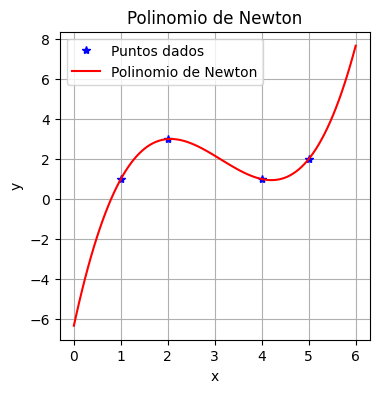

In [ ]:
# Ejemplo:
x = np.array([1, 2, 4, 5], float)
y = np.array([1, 3, 1, 2], float)

coeficientes, x_val, polinomio = matNewtonFull(x, y, 2)
print("Coeficientes del polinomio:", coeficientes, "\nevaluado en x: ", x_val, "\ncon un resultado de: ", polinomio)

# Grafica
# Puntos a evaluar
x_eval = np.linspace(0, 6, 100)

# Evaluar los puntos utilizando matNewtonFull
y_eval = matNewtonFull(x, y, x_eval)[2]

# Graficar
plt.figure(figsize = [4, 4])
plt.plot(x, y, 'b*', label='Puntos dados')
plt.plot(x_eval, y_eval, 'r', label='Polinomio de Newton')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polinomio de Newton')
plt.legend()
plt.grid(True)
plt.show()

Lagrange

In [ ]:
# Codigo completo de lagrange

def matLagrangeFull(x, y, x_val):
  ans = 0
  for k in range(len(x)):
    term = 1
    for i in range(len(x)):
      if i != k:
        term *= (x_val - x[i]) / (x[k] - x[i])
    ans += y[k] * term
  return ans

Resultado de:  3.0


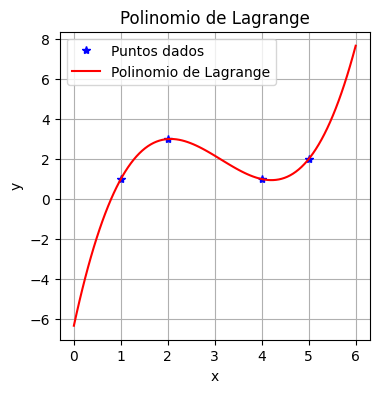

In [ ]:
# Ejemplo:
x = np.array([1, 2, 4, 5], float)
y = np.array([1, 3, 1, 2], float)

polinomio = matLagrangeFull(x, y, 2)
print("Resultado de: ", polinomio)

# Grafica

def P_lagrange(x_val):
  return matLagrangeFull(x, y, x_val)

x1 = np.linspace(0, 6, 100)

# Graficar los puntos y el polinomio de Lagrange
plt.figure(figsize = [4, 4])
plt.plot(x, y, 'b*', label = 'Puntos dados')
plt.plot(x1, P_lagrange(x1), 'r', label = 'Polinomio de Lagrange')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.title('Polinomio de Lagrange')
plt.show()

## Spine Cubicos

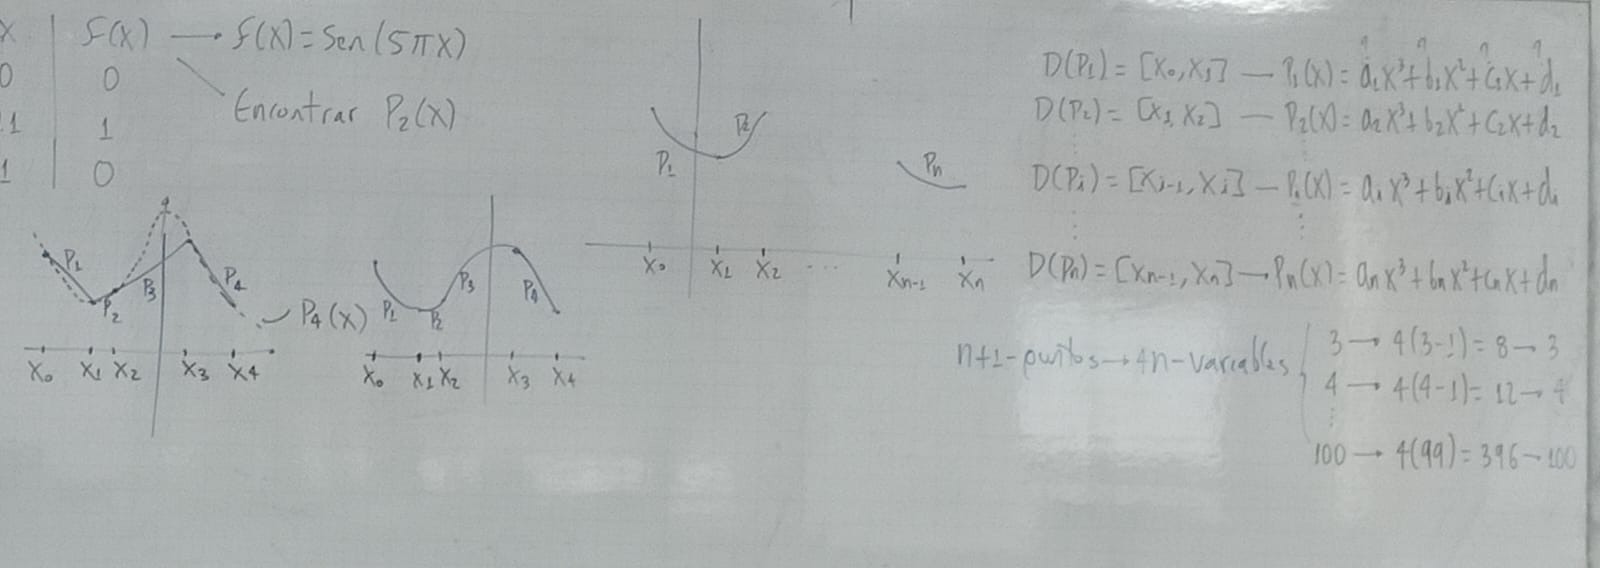

In [ ]:
Image("SplineCubica1.jpg")

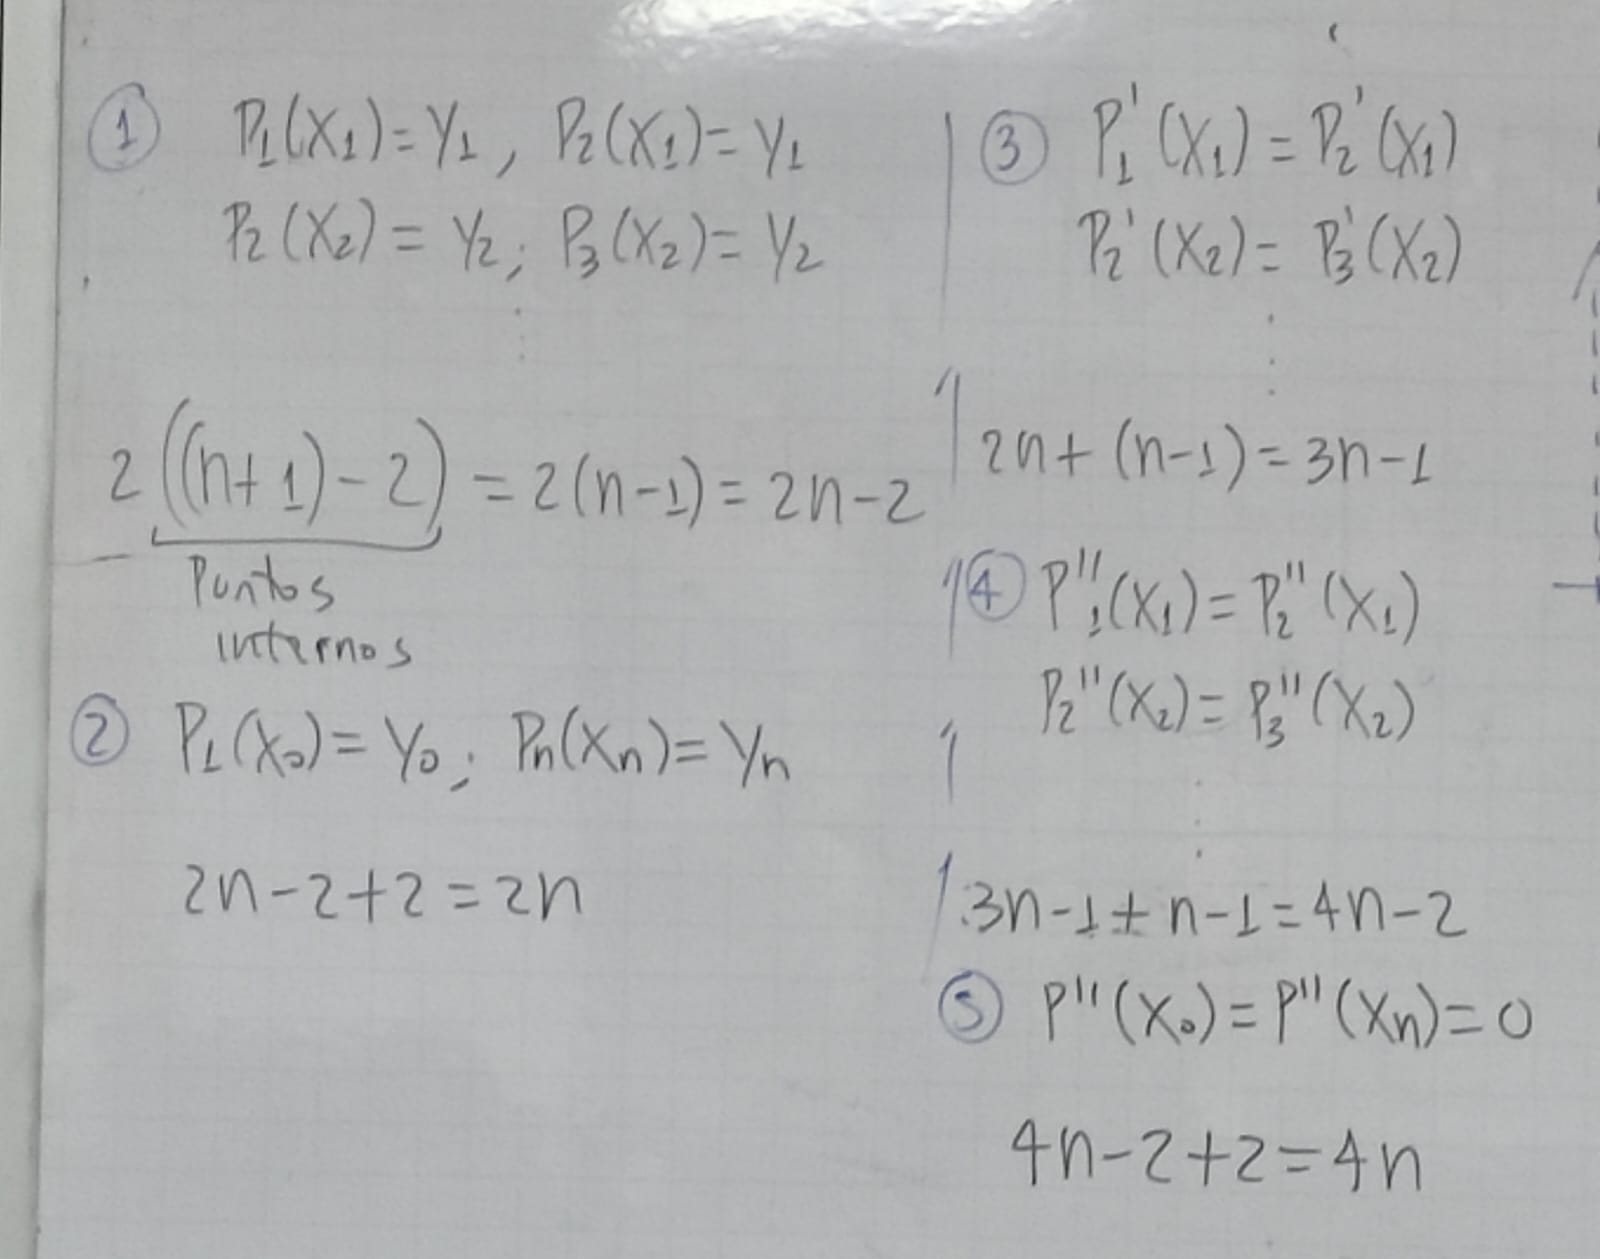

In [ ]:
Image("SplineCubica2.jpg")

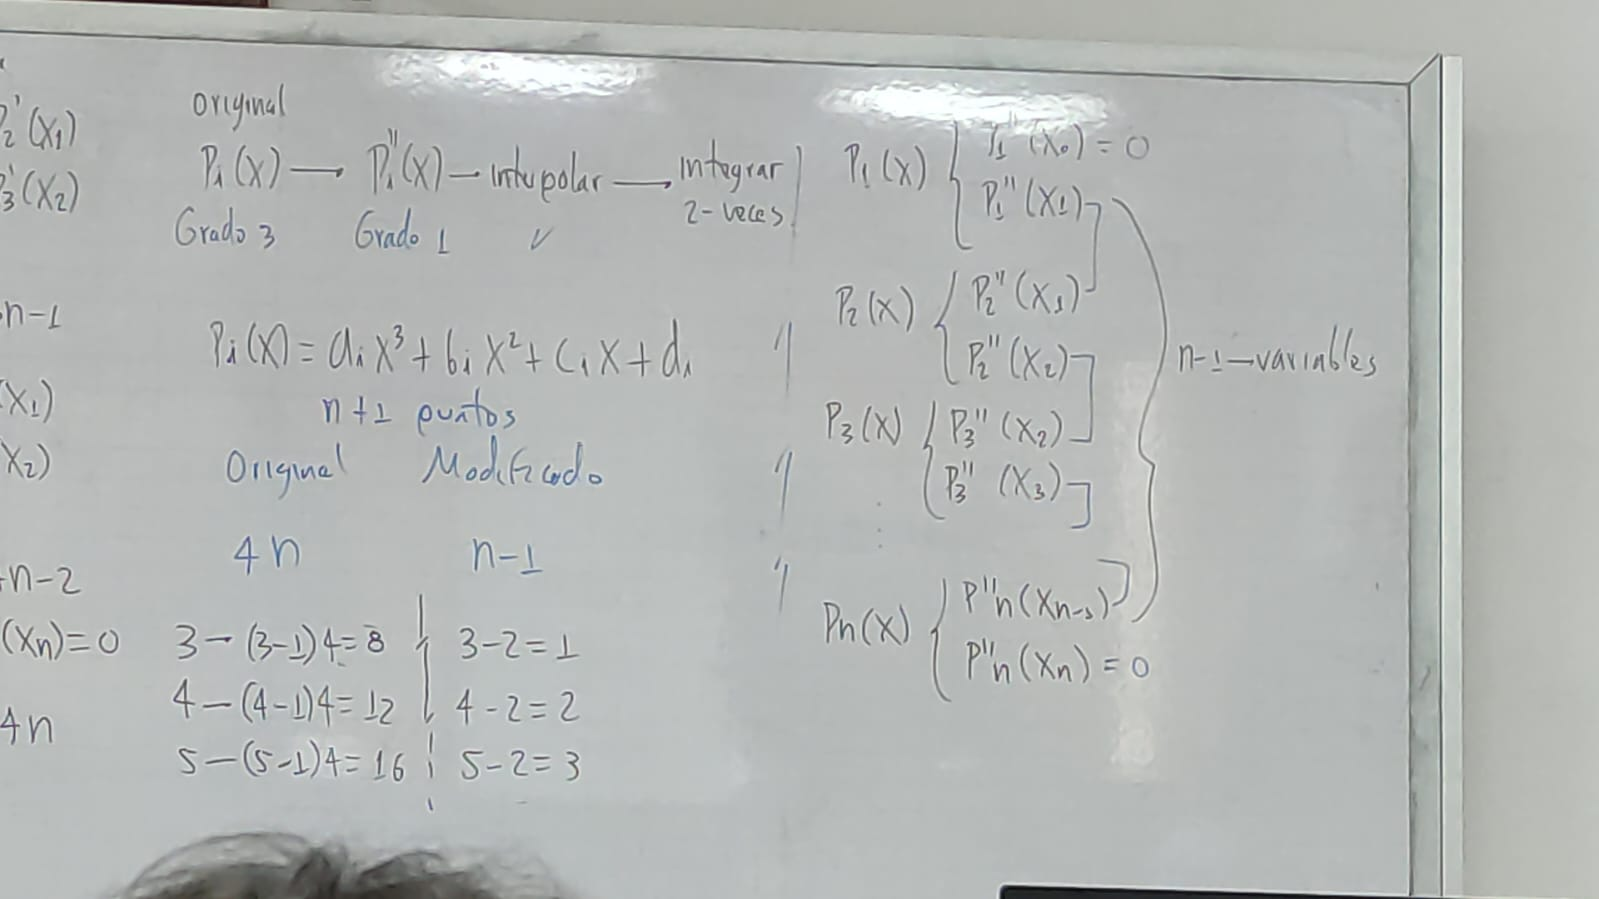

In [ ]:
Image("SplineCubica3.jpg")

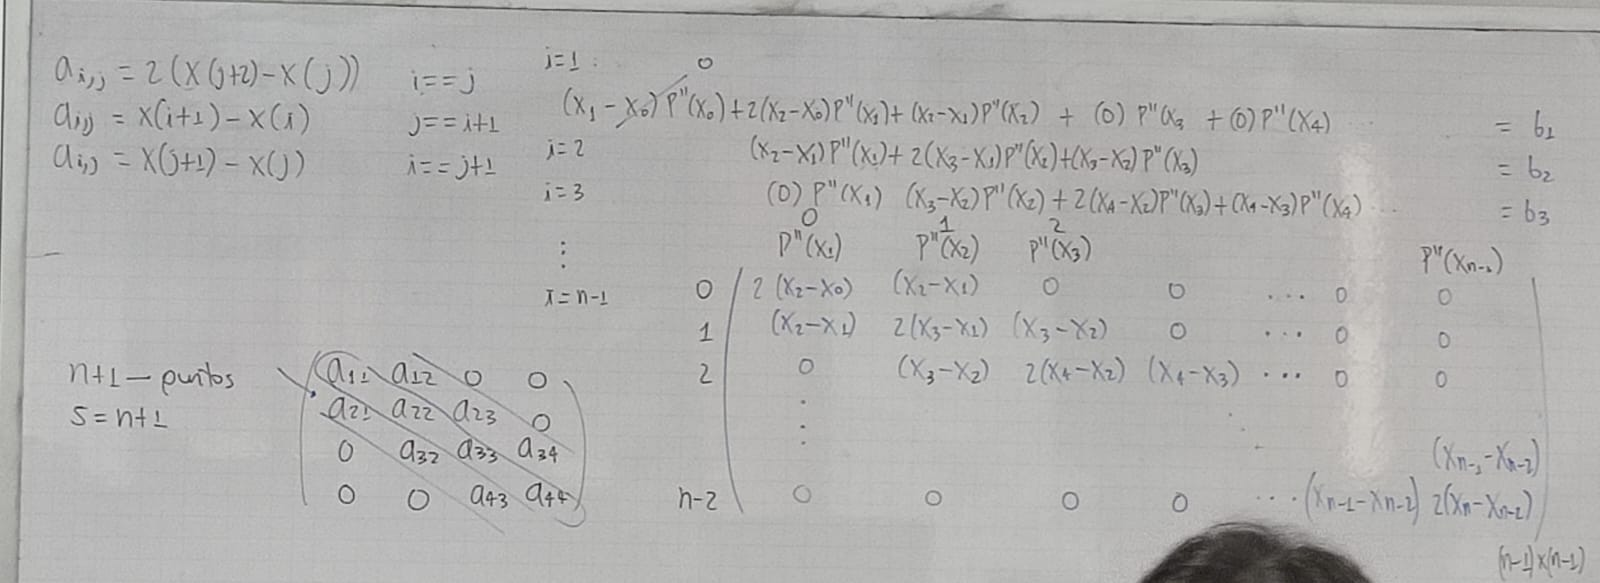

In [ ]:
Image("SplineCubica4.jpg")

In [ ]:
# Creacion de matriz de spline cubico

def matSpliCubico(x):
  n = len(x) - 2
  A = np.zeros((n, n))
  for i in range(n):
    for j in range(n):
      if i == j: # Diagonal principal
        A[i][j] = 2 * (x[j + 2] - x[j])
      elif j + 1 == i: # Diagonal Inferior
        A[i][j] = x[j + 2] - x[j + 1]
      elif j - 1 == i: # Diagonal Superior
        A[i][j] = x[j + 1] - x[j]
  return A

# Calculo vector b

def matSpline(x, y):
  n = len(x) - 2
  A = np.zeros([n, n])
  b = np.zeros([n, 1])
  for i in range(1, n + 1):
    A[i - 1,i - 1] = 2*(x[i + 1] - x[i - 1])
    if i < n:
      A[i,i - 1] = (x[i + 1] - x[i])
      A[i - 1,i] = (x[i + 1] - x[i])
    su1 = 6/(x[i + 1] - x[i])*(y[i + 1] - y[i])
    su2 = 6/(x[i] - x[i - 1])*(y[i - 1]-y[i])
    b[i - 1,0] = su1 + su2
  return np.linalg.solve(A,b).flatten()

In [ ]:
# Version Personal

x = np.array([3, 4.5, 7, 9], float)
y = np.array([2.5, 1, 2.5, 0.5], float)
A1 = matSpliCubico(x)
print(A1)
C1 = matSpline(x, y)
print(C1)
print()

[[8.  2.5]
 [2.5 9. ]]
[ 1.67908745 -1.53307985]



In [ ]:
### Mat_spline del profe

def profMatSpline(x,y):  # Matriz modificada y vector C
  n = len(x) - 2
  L = np.zeros((n, n))
  b = np.zeros((n, 1))
  for i in range(1, n + 1, 1):
    L[i - 1, i - 1] = 2 * (x[i + 1] - x[i - 1])
    if i < n:
      L[i, i - 1] = (x[i + 1] - x[i])
      L[i - 1,i] = (x[i + 1] - x[i])
    su1 = 6/(x[i + 1] - x[i]) * (y[i + 1] - y[i])
    su2 = 6/(x[i] - x[i - 1]) * (y[i - 1] - y[i])
    b[i - 1, 0] = su1 + su2
    c = np.zeros((n + 2, 1))
    c[1:n + 1:1, :] = np.linalg.solve(L, b)
  return L , c

def polSplineCubico(x, y, i, c, x1):  # Evaluacion del polinomio
  const = (x[i] - x[i - 1])
  su1 = c[i - 1, 0]/(6 * const) * (x[i] - x1) ** 3
  su2 = c[i, 0]/(6 * const) * (x1 - x[i - 1]) ** 3
  su3 = (y[i - 1] / const - c[i - 1, 0] * (const) / 6) * (x[i] - x1)
  su4 = (y[i] / const - c[i, 0] * (const) / 6) * (x1 - x[i - 1])
  ans = su1 + su2 + su3 + su4
  return ans

# Nota: Se puede generalizar para que encuentre todos los polinomios desde 1 hasta el de n - 1 del tamaño de x,
#  aca solo busca y evalua el que se le indique.

def clasSplineCubico(x, y, C):   # Grafica de los polinomios
  n = len(x) - 1
  valoresX, valoresY = [], []
  for i in range(n):
    rango = np.linspace(x[i], x[i + 1], 100)
    valoresX.extend(rango)
    valoresY.extend(polSplineCubico(x, y, i + 1, C, rango))
  return valoresX, valoresY

# Nota: Para usar la clasificacion para graficar, debe estar organizado el vector x de la entrada ordenado de menor a mayor y si se quiere
# usar seccionado por los polinomios, toca cambiar extend por append y en la grafica cambiarlo.

[[8.  2.5]
 [2.5 9. ]]
[[ 0.        ]
 [ 1.67908745]
 [-1.53307985]
 [ 0.        ]]



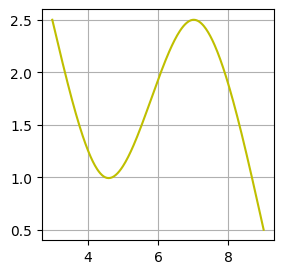

In [ ]:
# Version Profe

x = np.array([3, 4.5, 7, 9], float)
y = np.array([2.5, 1, 2.5, 0.5], float)

# vector C y matriz modificada
A2, C2  = profMatSpline(x, y)
print(A1)
print(C2)
print()

# Polinomio
valoresX, valoresY = clasSplineCubico(x, y, C2)
# print(valoresX, valoresY)

# Manual
# x1 = np.linspace(1, 4.5, 100)
# y1 = polSplineCubico(x, y, 1, C2, x1)
# x2 = np.linspace(4.5, 7, 100)
# y2 = polSplineCubico(x, y, 2, C2, x2)
# x3 = np.linspace(7, 11, 100)
# y3 = polSplineCubico(x, y, 3, C2, x3)

# Grafica
plt.figure(figsize = [3, 3])
# plt.plot(x1, y1, 'r', x2, y2, 'b', x3, y3, 'g')  # Manual
# plt.plot(valoresX[0], valoresY[0], 'r', valoresX[1], valoresY[1], 'b', valoresX[2], valoresY[2], 'g') # Seccionado
plt.plot(valoresX, valoresY, 'y') # Total
plt.grid()

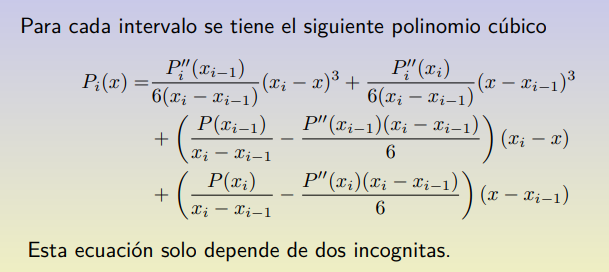

In [ ]:
Image("SplineCubicoManual.png")

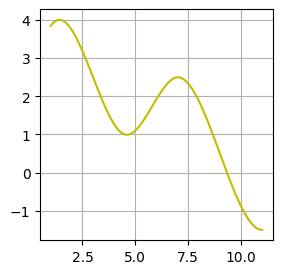

In [ ]:
# Version con libreria

f = CubicSpline(x, y, bc_type = 'natural')
x_new = np.linspace(1, 11, 300)
y_extra = f(x_new)
plt.figure(figsize = [3, 3])
plt.plot(x_new, y_extra, 'y')
plt.grid()

## Regresion Lineal

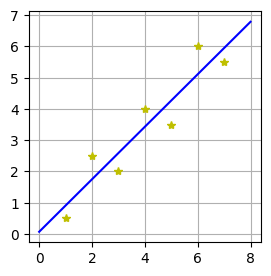

In [ ]:
def regLineal(x, y):
  n = len(x)
  a1 = (n * sum(x * y) - sum(x) * sum(y)) / (n * sum(x ** 2) - (sum(x)) ** 2)
  a0 = sum(y)/n - (sum(x) * a1)/n
  return  a1, a0

def funLineal(a1, a0, x1):
  return a0 + a1 * x1

x = np.array([1, 2, 3, 4, 5, 6, 7])
y = np.array([0.5, 2.5, 2, 4, 3.5, 6, 5.5])
[a1, a0] = regLineal(x, y)

# Grafica
x1 = np.linspace(0, 8, 100)
plt.figure(figsize = [3, 3])
plt.plot(x, y, 'y*', x1, funLineal(a1, a0, x1), 'b')
plt.grid()

# Unidad #6_1 - Diferenciacion Numerica

## Diferencia Numerica

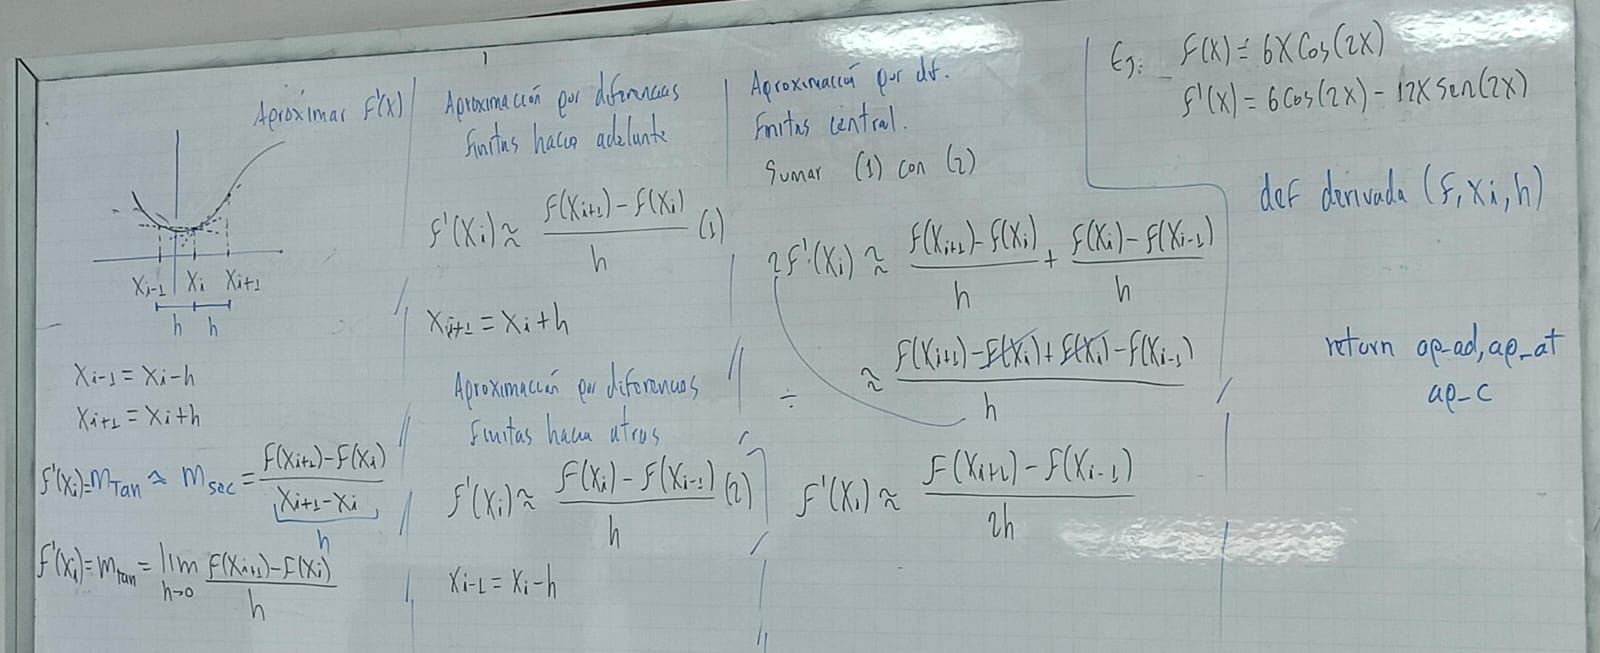

In [ ]:
Image("ExplicacionDifNum.jpg")

In [ ]:
# Codigo Diferencia Numerica

def derivada(f, xi, h):
  post, pred, act = f(xi + h), f(xi - h), f(xi)
  ap_at = (act - pred)/ h         # Diferencia finita hacia atras
  ap_c = (post - pred)/ (2 * h)   # Diferencia finita central
  ap_ad = (post - act)/ h         # Diferencia finita hacia adelante
  return ap_at, ap_c, ap_ad

# Nota: Normalmente, siempre la mejor sera la central, porque no depende del punto y es una secante exacta a la formula,
# lo malo es que pide mucha informacion la cual se puede no tener.

# Calculo error

def error(real, aprox):
  return np.abs(real - aprox)/np.abs(real) * 100

In [ ]:
# Ejemplo

def f(x):
  return 6 * x * np.cos(2 * x)

def fp(x):
  return 6 * np.cos(2 * x) - 12 * x * np.sin(2 * x)


[atras, central, adelante] = derivada(f, 3, 0.001)
print("Hacia atras: ", atras, "\nCentral: ", central, "\nHacia adelante: ", adelante)
real = fp(3)
print("\nValor Real:", real)
difAt = error(real, atras)   # Calculo error
difCe = error(real, central)
difAd = error(real, adelante)
print("\nDiferencias: {0:.8f}, {1:.8f}, {2:.8f}".format(difAt, difCe, difAd))

Hacia atras:  15.85117456210483 
Central:  15.819961427050444 
Hacia adelante:  15.788748291996058

Valor Real: 15.819979655063527

Diferencias: 0.19718677, 0.00011522, 0.19741721


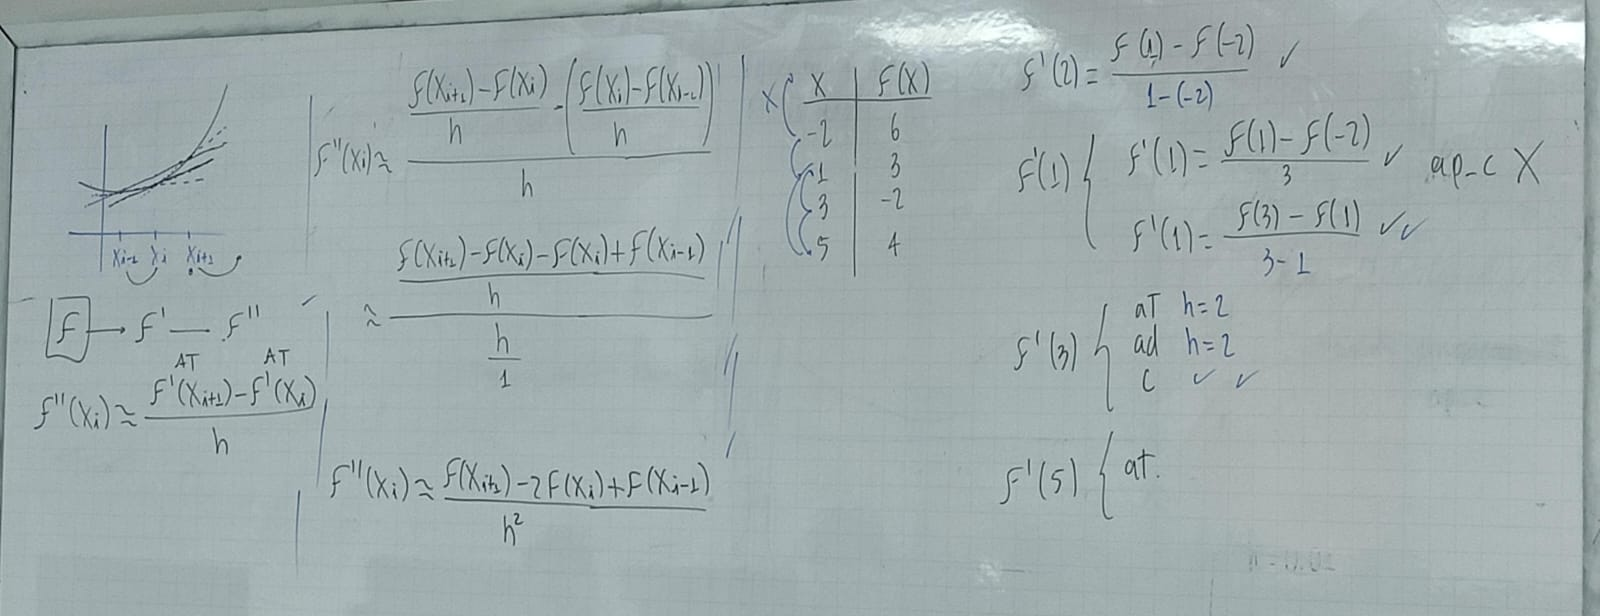

In [ ]:
Image("ExplicacionDifNum2.jpg")

Nota: Si se busca algun x que no esta, entonces hay que usar el polinomio interpolado, usando ternas de solo 3 valores que contengan el valor a aproximar. En este ejemplo se escogeria los x = -2, 1, 3, porque el 0 esta entre ellos, si hubiera otras tres opciones a escoger, se selecciona el trio mas pequeño para facilitar el calculo, despues de esto se usaria newton o lagrange para encontrar la funcion que albergue ese punto.

In [ ]:
# Codigo Segunda derivada

def segundaDerivada(f, xi, h):
  post, pred, act = f(xi + h), f(xi - h), f(xi)
  ap_at_at = (post - (2 * act) + pred)/(h ** 2) # Atras Atras
  return ap_at_at

In [ ]:
# Ejemplo con segunda derivada

# Se usara el mismo f y fp del elejmplo anterior

def fpp(x):
  return  -24 * np.sin(2 * x) - 24 * x * np.cos(2 * x)


ap_at_at = segundaDerivada(f, 3, 0.001)
print("Hacia atras atras: ", ap_at_at)
real2 = fpp(3)
print("\nValor Real:", real2)
dif = error(real2, ap_at_at)  # Calculo error
print("\nDiferencias: {0:.8f}".format(dif))

Hacia atras atras:  -62.426270108773

Valor Real: -62.42628868205213

Diferencias: 0.00002975


In [ ]:
# Codigo Modificado Newton

def matNewtonFull2(x, y, x_val):
  coef, x_val, pol = matNewtonFull(x, y, x_val)
  return coef[1] + coef[2] * (2 * x_val - (x[0] + x[1]))

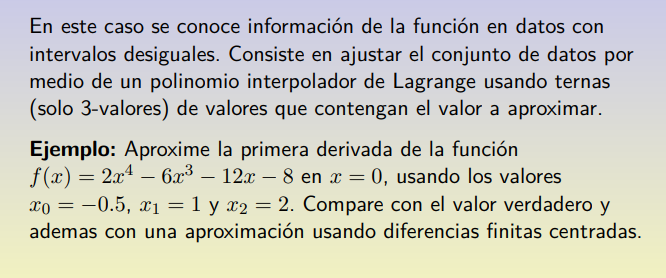

In [ ]:
Image("EjercicioClaseTernas.png")

In [ ]:
# Ejercicio de diapositiva

def f(x):
  return 2 * (x ** 4) - 6 * (x ** 3) - 12 * x - 8

def fp(x):
  return 8 * (x ** 3) - 18 * (x ** 2) - 12

x = np.array([-0.5, 1, 2], float)
y = np.array([f(-0.5), f(1), f(2)], float)

coeficientes, x_val, polinomio = matNewtonFull(x, y, 0)
print("Coeficientes del polinomio:", coeficientes)
aprox = matNewtonFull2(x, y, 0)
print("Resultado evaluado en 0:", aprox)

realEj = fp(0)
print("\nValor Real:", realEj)
difEj = error(realEj, aprox)   # Calculo error
print("\nDiferencias: {0:.8f}".format(difEj))

Coeficientes del polinomio: [ -1.125 -15.25   -3.5  ]
Resultado evaluado en 0: -13.5

Valor Real: -12

Diferencias: 12.50000000


Manual:

Resolver el sistema de ecuaciones:

$$
C_1 = -15.25 \\
C_2 = -3.5
$$

**Formula:**
$$
P_2'(x) = C_1 + C_2(2x - (x0 + x1))
$$

**Ecuación final del polinomio:**

$$
P_2(x) = -15.25 - 3.5(2x - (-0.5 + 1)) \\
P_2(x) = -13.5 -7x \\
P_2(0) = -13.5
$$

## Integracion Numerica

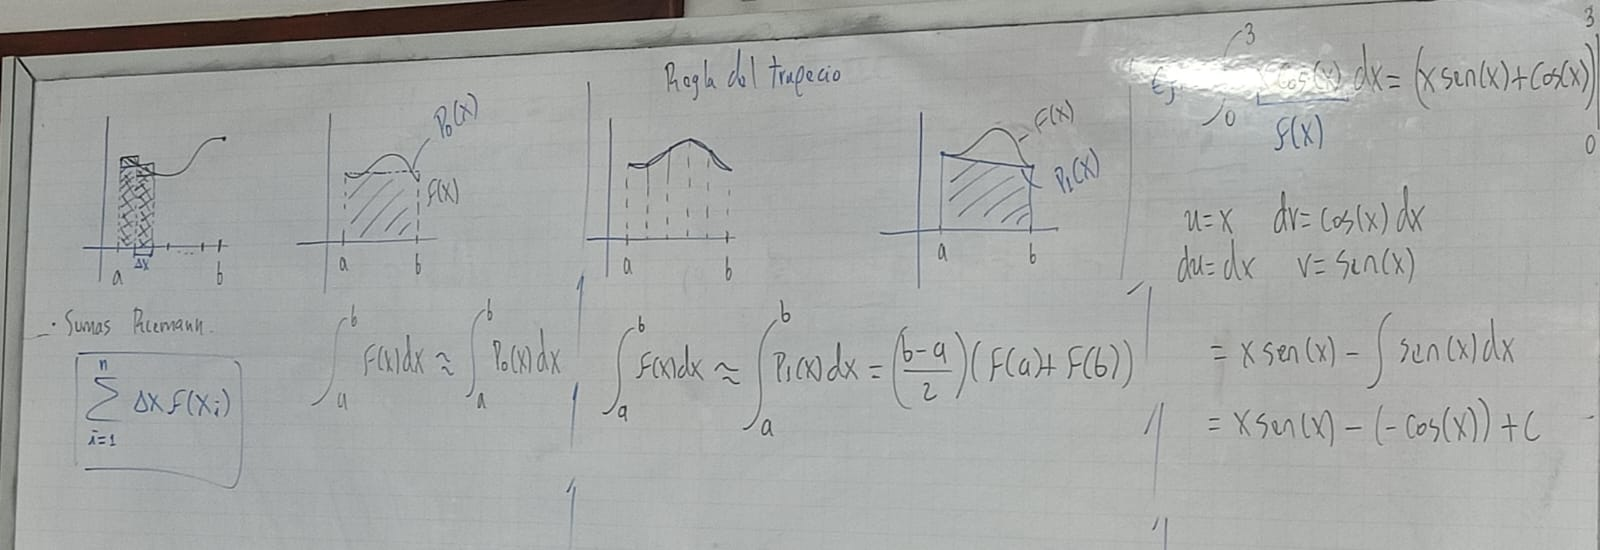

In [ ]:
Image("integracionReglaTrapecio.jpg")

0.27244854172337035 0.44968435038131016

Diferencias: 39.41338152


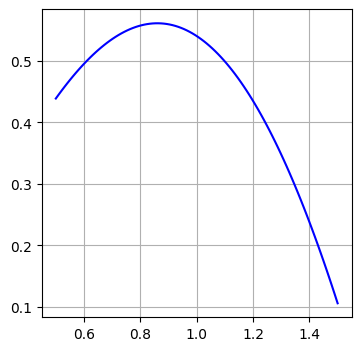

In [ ]:
def f(x):
  return x * np.cos(x)

def integral(x):
  return x * np.sin(x) + np.cos(x)

x = np.linspace(0.5, 1.5, 100)
plt.figure(figsize = [4, 4])
plt.plot(x, f(x), 'b')
plt.grid()

# Aplicando formula
aprox = (1.5 - 0.5)/2 * (f(1.5) + f(0.5))
real = integral(1.5) - integral(0.5)
print(aprox, real)

# Calculando error
err = error(real, aprox)   # Calculo error
print("\nDiferencias: {0:.8f}".format(err))

In [ ]:
# Funcion regla del trapecio
# f es la integral
# [a, b] limites de integracion
# n - 1 numero de particiones

def reglaTrapecio(f, a, b, n):
  x = np.linspace(a, b, n)
  su = 0
  for i in range(0, n - 1, 1):
    su += (x[i + 1] - x[i]) / 2 * (f(x[i + 1]) + f(x[i]))
  return su

ap2 = reglaTrapecio(f, 0.5, 1.5, 2)
real2 = integral(1.5) - integral(0.5)
print(real2, ap2, error(real2, ap2))

0.44968435038131016 0.27244854172337035 39.41338152142777


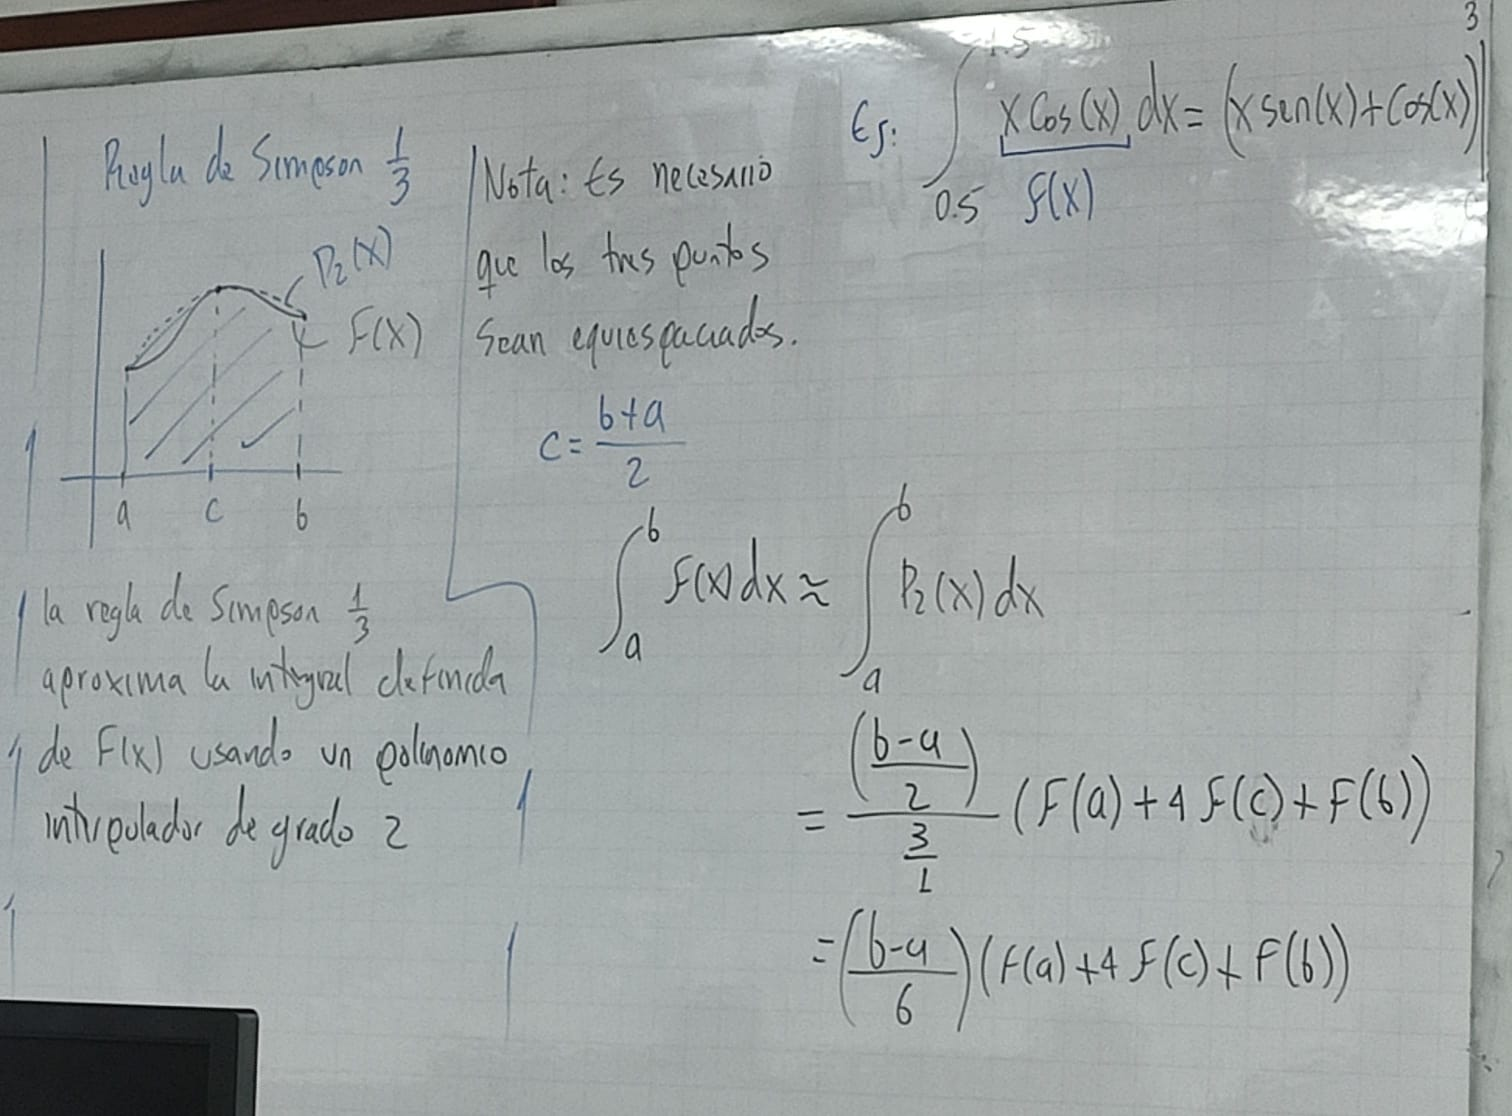

In [ ]:
Image("integracionReglaSimpson.jpg")

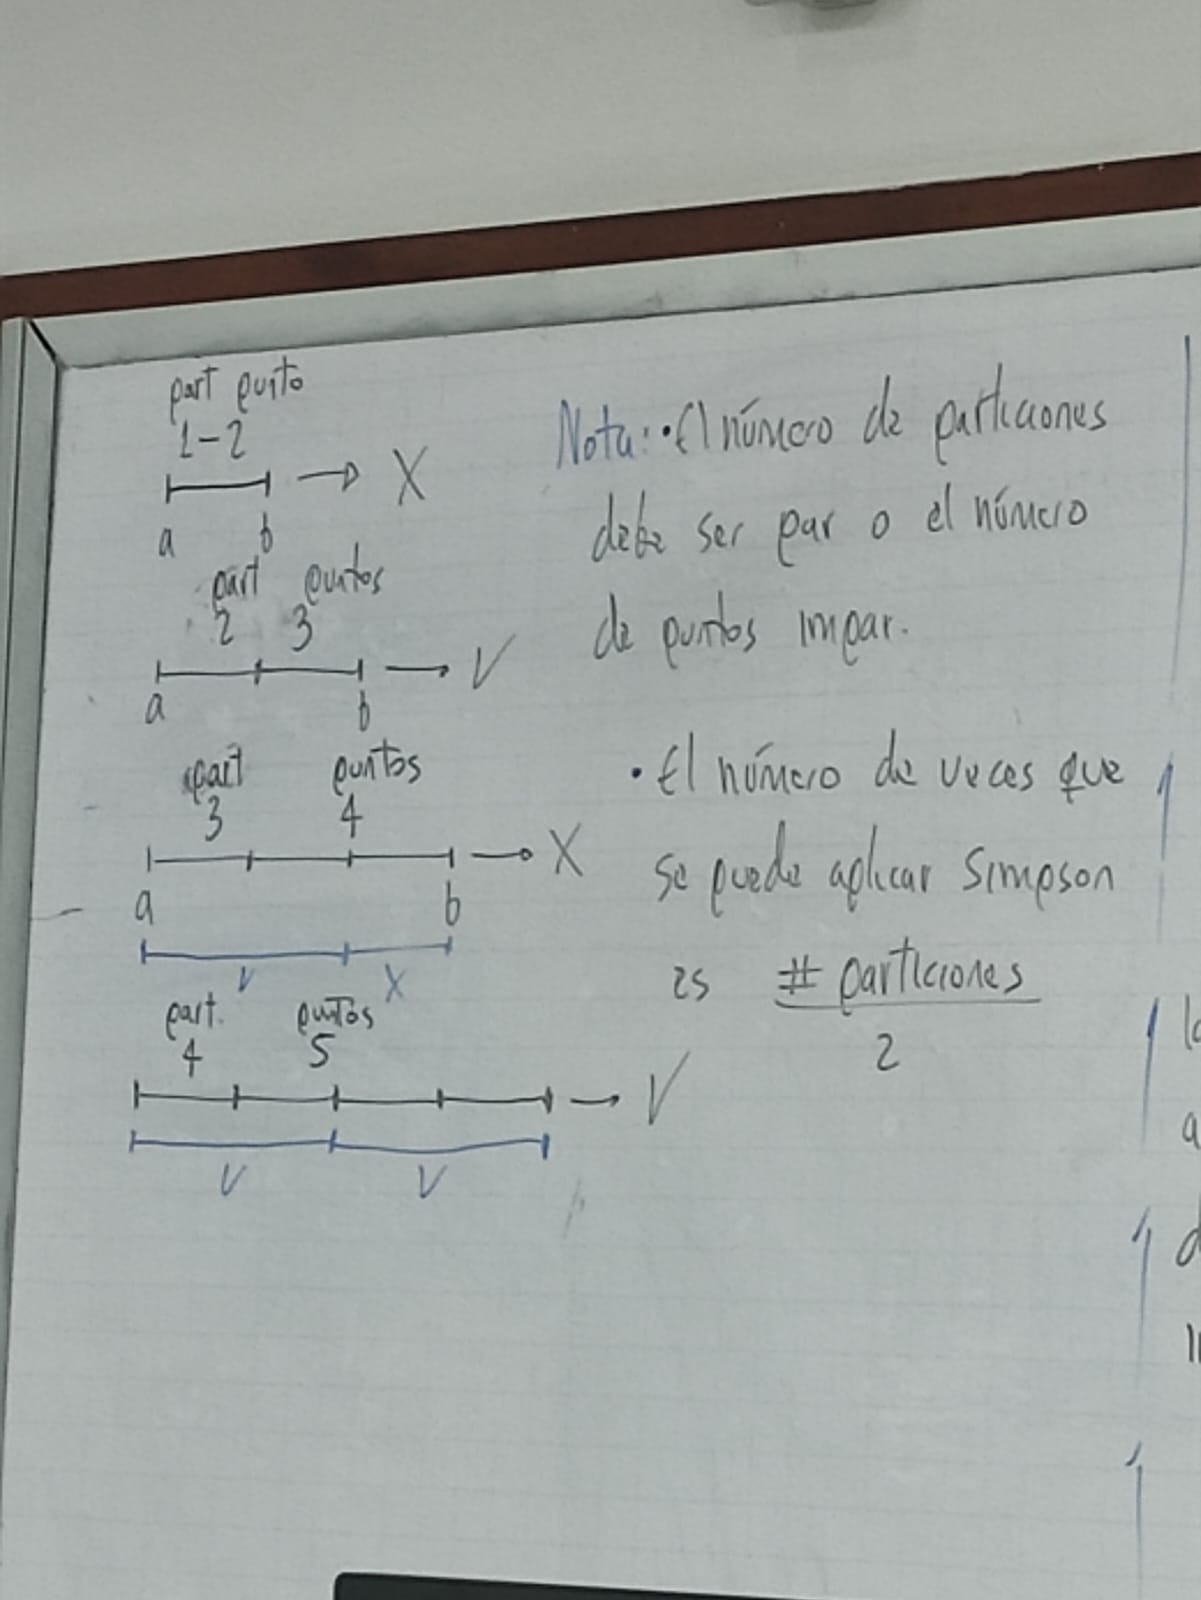

In [ ]:
Image("integracionReglaSimpson2.jpg")

In [ ]:
# Funcion regla de simpson 1/3
# f es la integral
# [a, b] limites de integracion
# n - 1 numero de particiones
# n es impar por lo cual n - 1 es par

def reglaSimpson(f, a, b, n):
  if n % 2 == 0:
    return "Error, entrada no valida, los numero de particiones no son impares."
  else:
    x = np.linspace(a, b, n)
    su = 0
    for i in range(0, int((n - 1)/2), 1):
      su += (x[2 * i + 2] - x[2 * i]) / 6 * (f(x[2 * i]) + 4 * f(x[2 * i + 1]) + f(x[2 * i + 2]))
    return su

ap3 = reglaSimpson(f, 0.5, 1.5, 5)
real3 = integral(1.5) - integral(0.5)
print(real3, ap3, error(real3, ap3))

0.44968435038131016 0.4497650094817355 0.017936826210857175


In [ ]:
x = np.array([0, 0.12, 0.22, 0.32, 0.36, 0.40, 0.44, 0.54, 0.64])
y = np.array([0.2, 1.309, 1.305, 1.743, 2.074, 2.456, 2.842, 3.507, 3.181])

def trapecio_tabla(x, y):
  su = 0
  n = len(x) - 1
  for i in range(n):
    su += (x[i + 1] - x[i])/2 * (y[i + 1] + (y[i]))
  return su

print(trapecio_tabla(x, y))

1.2983900000000002


In [ ]:
def simpson_tabla(x, y):
  n = len(x)
  if n % 2 == 0:
    return "Error, entrada no valida, los numero de particiones no son impares. Por ende, se usara trapecios :", trapecio_tabla(x, y)
  else:
    su = 0
    for i in range(0, int((n - 1)/2), 1):
      su += (x[2 * i + 2] - x[2 * i]) / 6 * (y[2 * i] + 4 * y[2 * i + 1] + y[2 * i + 2])
    return su

print(simpson_tabla(x, y))

1.3535933333333334


# Unidad #7_1 - Ecuaciones Diferenciales (ED)

## Ecuaciones Diferenciales Ordinarias

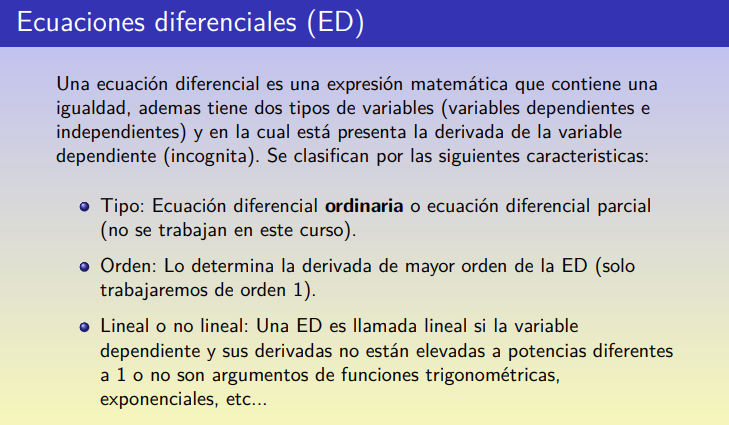

In [ ]:
Image("CaracteristicasED.png")

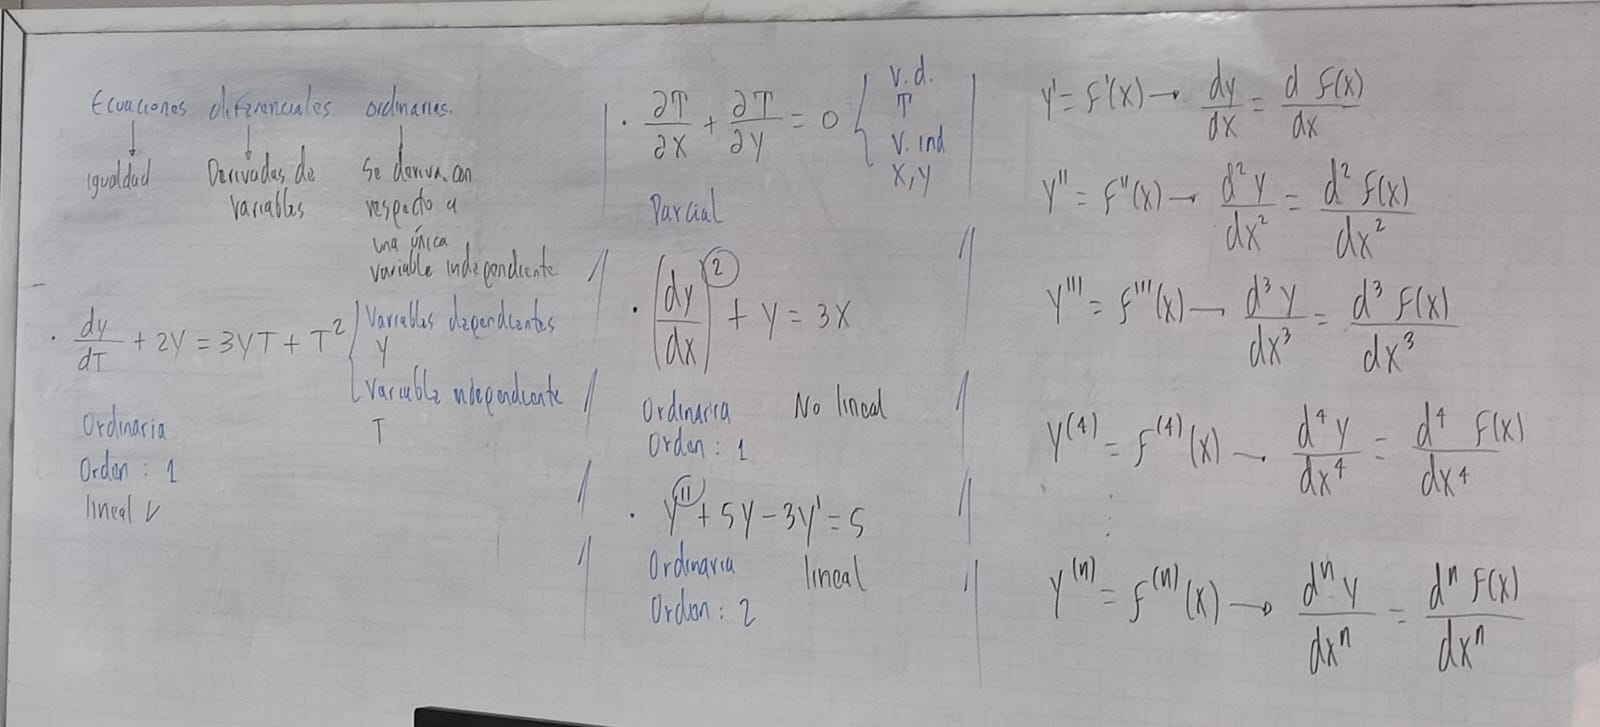

In [ ]:
Image("Ordinarias.jpg")

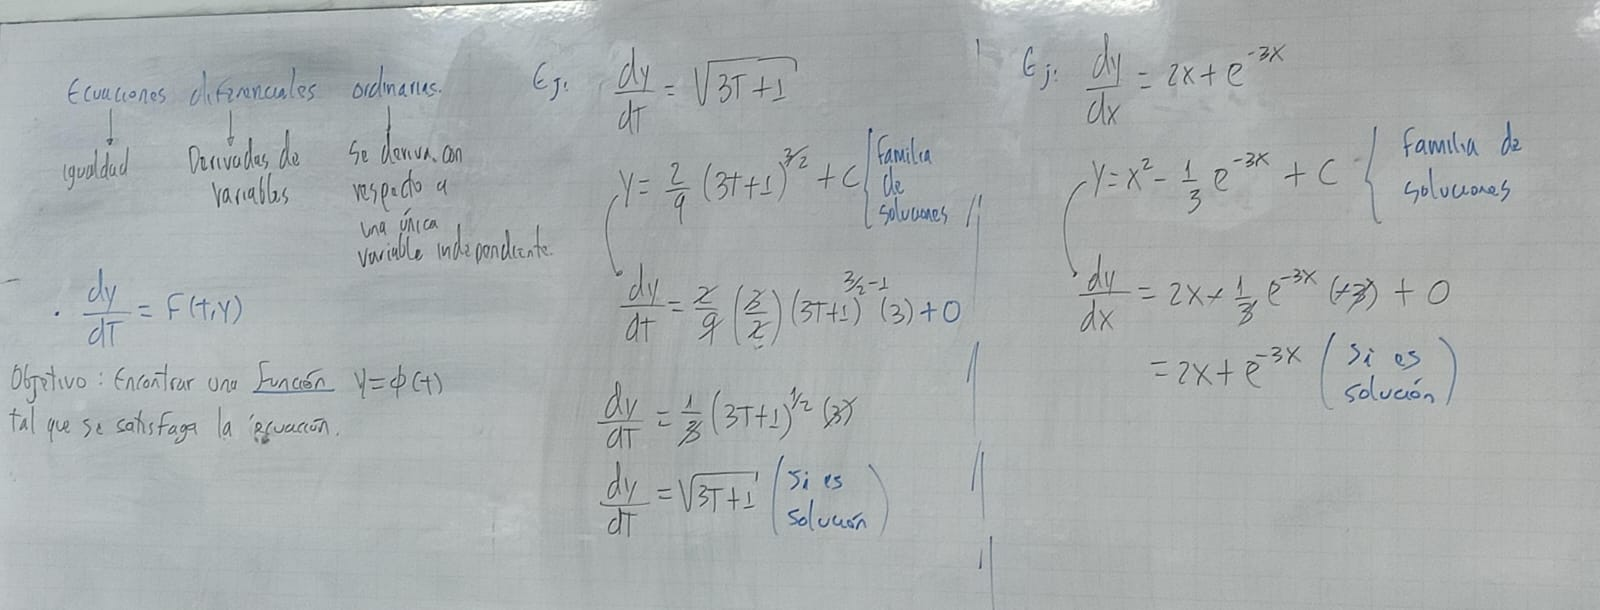

In [ ]:
Image("Ordinarias2.jpg")

**Nota: Una solucion general para una E.D.O contiene infinitas soluciones.**

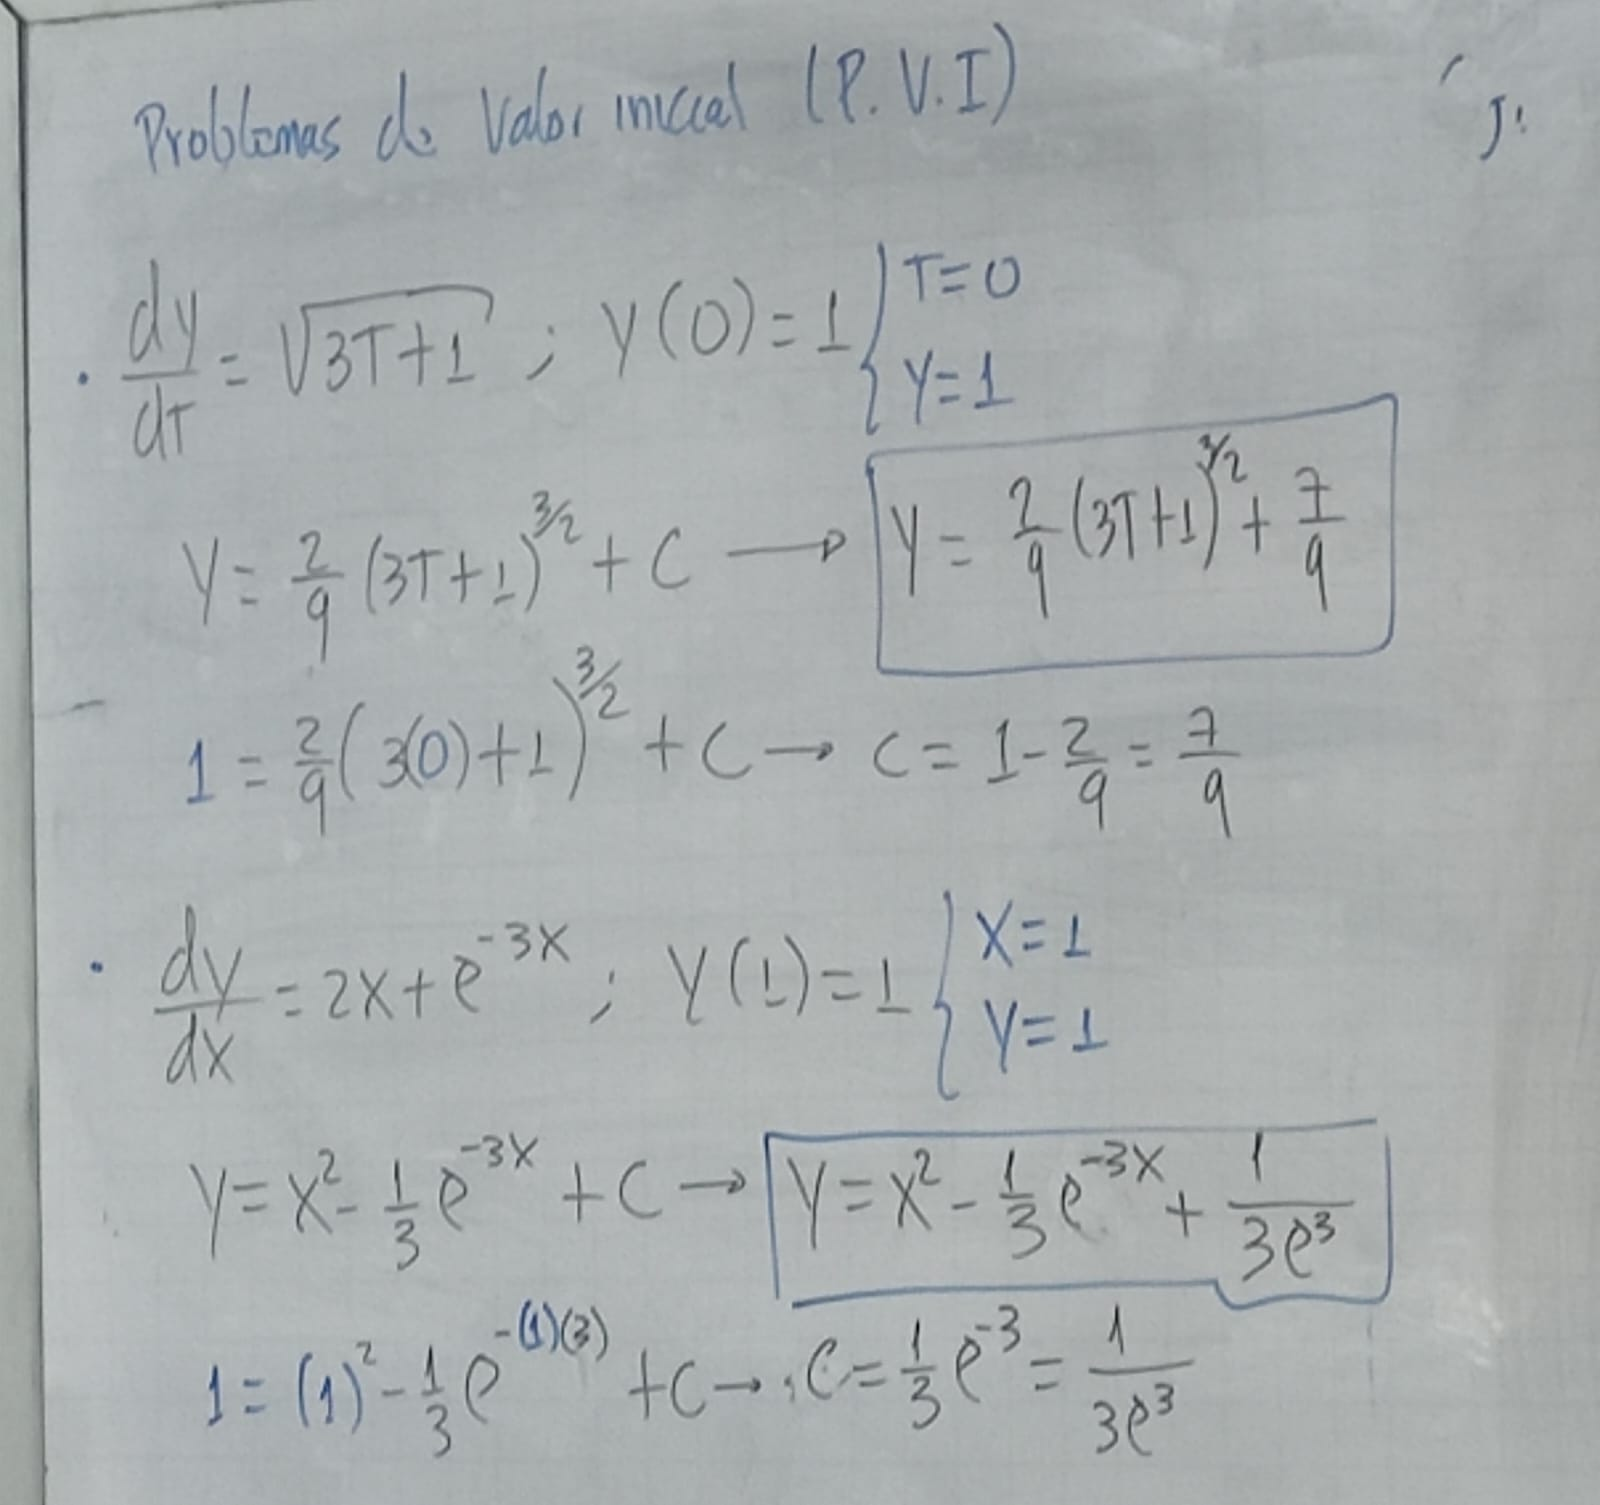

In [ ]:
Image("Ordinarias3.jpg")

## Metodo Euler

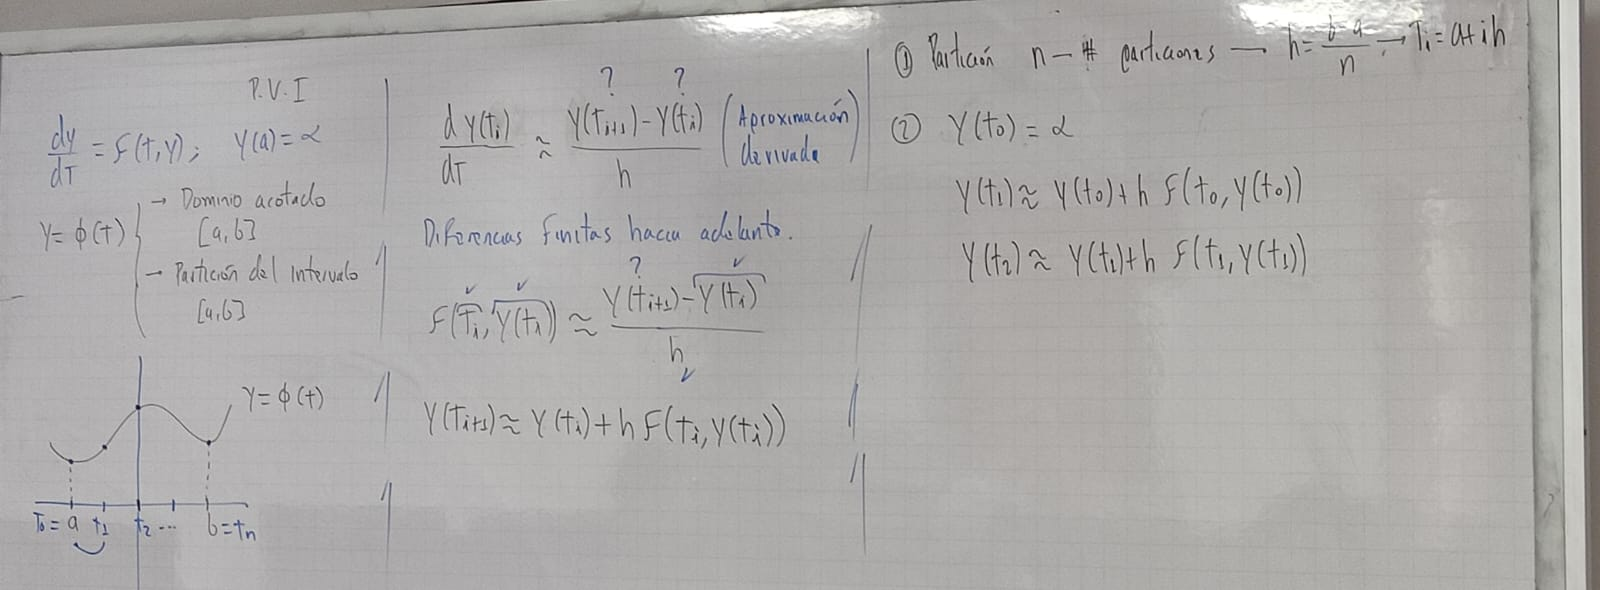

In [ ]:
Image("DifFinitasHaciaAdelante.jpg")

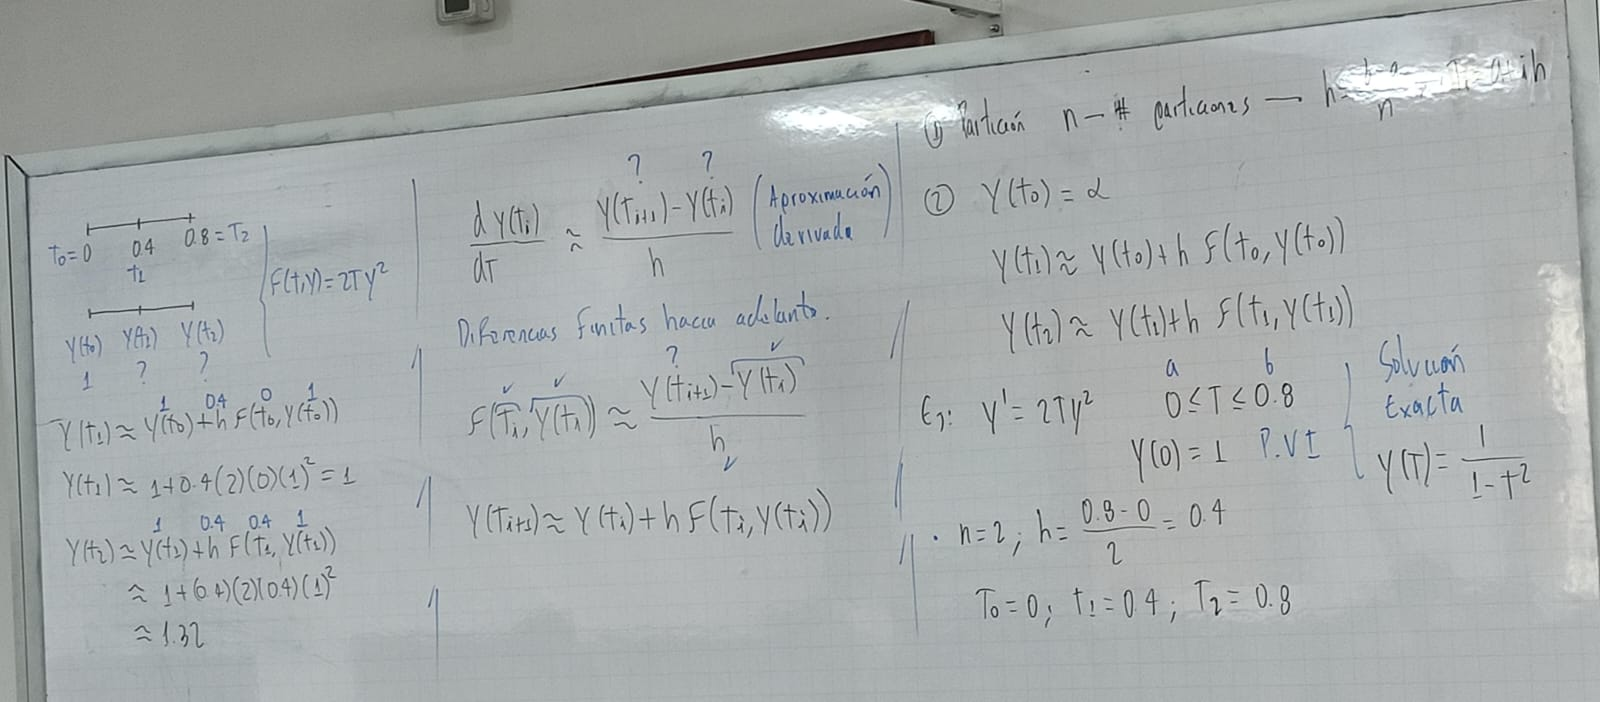

In [ ]:
Image("DifFinitasHaciaAdelanteEj.jpg")

In [ ]:
# [a, b] : limites del tiempo
# f : es la funcion del tiempo
# n : numero de particiones
# ci : condicion inicial

def metEuler(f, a, b, n, ci):
  t = np.linspace(a, b, n + 1)
  h = (b - a)/n
  y_aprox = t * 0
  y_aprox[0] = ci
  for i in range(0, n, 1):
    y_aprox[i + 1] = y_aprox[i] + h * f(t[i], y_aprox[i])
  return t, y_aprox

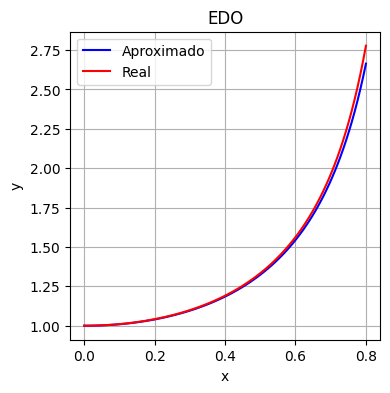

Error de vecctores 2.000


In [ ]:
# Ejemplo

def f(t, y):
  return 2 * t * y ** 2

t, val = metEuler(f, 0, 0.8, 100, 1)  # Si se aumenta el n se va acercando cada vez mas al real
# print("Tiempos: ", t, ", Valores:", val, "\n")

def real(t):
  return 1 / (1 - t ** 2)

x1 = np.linspace(0, 0.8, 100)

# Grafica
plt.figure(figsize = [4, 4])
plt.plot(t, val, 'b', label = 'Aproximado')
plt.plot(x1, real(x1), 'r', label = 'Real')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.title('EDO')
plt.show()

# Calculo de error entre los 2 vectores
errorVec = np.linalg.norm(real(t) - val, 2)/(np.linalg.norm(real(t), 2)) * 100
print("Error de vecctores {:.3f}".format(round(errorVec,2)))

## Metodo Runge-Kutter 2

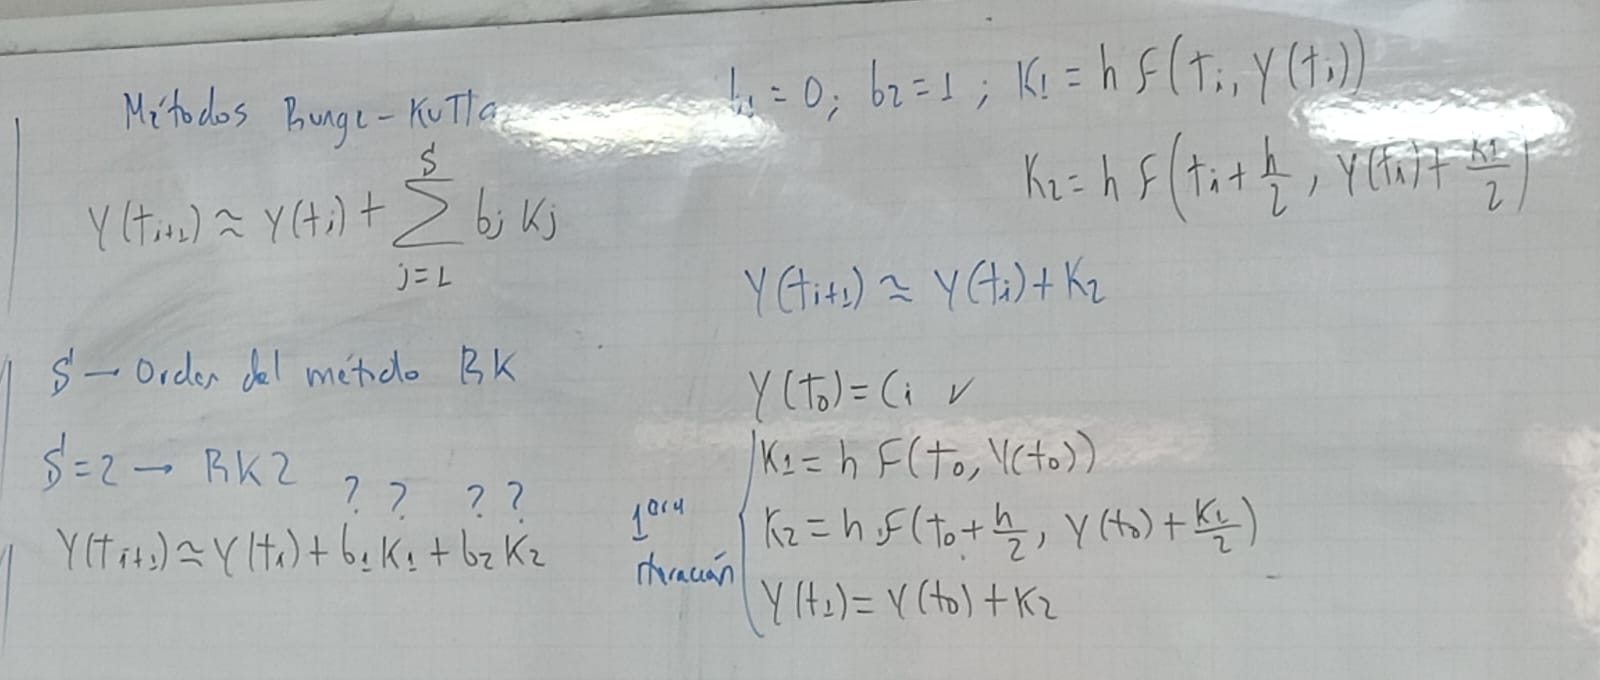

In [ ]:
Image("metRunge.jpg")

In [ ]:
# [a, b] : limites del tiempo
# f : es la funcion del tiempo
# n : numero de particiones
# ci : condicion inicial

def metRungeKutter2(f, a, b, n, ci):
  t = np.linspace(a, b, n + 1)
  h = (b - a)/n
  y_aprox = t * 0
  y_aprox[0] = ci
  for i in range(0, n, 1):
    k1 = h * f(t[i], y_aprox[i])
    k2 = h * f(t[i] + h/2, y_aprox[i] + k1/2)
    y_aprox[i + 1] = y_aprox[i] + k2
  return t, y_aprox

Errores de Euler: 16.300 y RungeKutter2: 2.230


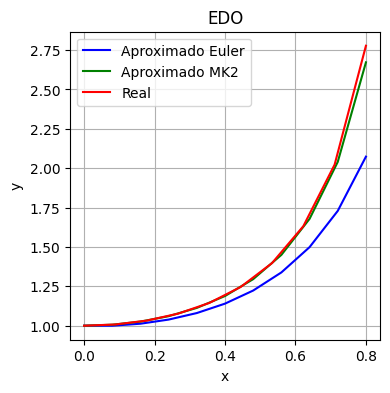

In [ ]:
# Ejemplo

n = 10 # Si se aumenta el n se va acercando cada vez mas al real
t, val = metEuler(f, 0, 0.8, n, 1)
t, val2 = metRungeKutter2(f, 0, 0.8, n, 1)

# Calculo de error entre los 2 metodos
error1 = np.linalg.norm(real(t) - val, 2)/(np.linalg.norm(real(t), 2)) * 100
error2 = np.linalg.norm(real(t) - val2, 2)/(np.linalg.norm(real(t), 2)) * 100
print("Errores de Euler: {:.3f} y RungeKutter2: {:.3f}".format(round(error1,2), round(error2,2)))

x1 = np.linspace(0, 0.8, n)

# Grafica
plt.figure(figsize = [4, 4])
plt.plot(t, val, 'b', label = 'Aproximado Euler')
plt.plot(t, val2, 'g', label = 'Aproximado MK2')
plt.plot(x1, real(x1), 'r', label = 'Real')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.title('EDO')
plt.show()

## Metodo Runge-Kutter 4

In [ ]:
# [a, b] : limites del tiempo
# f : es la funcion del tiempo
# n : numero de particiones
# ci : condicion inicial

def metRungeKutter4(f, a, b, n, ci):
  t = np.linspace(a, b, n + 1)
  h = (b - a)/n
  y_aprox = t * 0
  y_aprox[0] = ci
  for i in range(0, n, 1):
    k1 = h * f(t[i], y_aprox[i])
    k2 = h * f(t[i] + h/2, y_aprox[i] + k1/2)
    k3 = h * f(t[i] + h/2, y_aprox[i] + k2/2)
    k4 = h * f(t[i] + h, y_aprox[i] + k3)
    y_aprox[i + 1] = y_aprox[i] + k1 / 6 + k2/3 + k3/3 + k4/6
  return t, y_aprox

In [ ]:
# Ejemplo y comparativa

n = 20
[t1, y_aprox1] = metEuler(f, 0, 0.8, n, 1)
[t2, y_aprox2] = metRungeKutter2(f, 0, 0.8, n, 1)
[t3, y_aprox3] = metRungeKutter4(f, 0, 0.8, n, 1)
error_1 = np.linalg.norm(real(t1) - y_aprox1, 2)/(np.linalg.norm(real(t1), 2)) * 100
error_2 = np.linalg.norm(real(t2) - y_aprox2, 2)/(np.linalg.norm(real(t2), 2)) * 100
error_3 = np.linalg.norm(real(t3) - y_aprox3, 2)/(np.linalg.norm(real(t3), 2)) * 100
print(error_1, error_2, error_3)

9.043905910175559 0.5877269257102574 0.00024826084328240315


# Unidad #7_2 - Ecuaciones Diferenciales Segunda Parte (ED)

## Solve_ivp

In [ ]:
def f(t, y):
  return 2 * t * y ** 2

def real(t):
  return 1/(1 - t ** 2)

y_aprox = solve_ivp(f, [0, 0.8], [1])
t1 = y_aprox.t
print(t1, len(t1))
y_aprox1 = y_aprox.y[0]
[t2, y_aprox2] = metRungeKutter4(f, 0, 0.8, 8, 1)
print(t2)
error1 = np.linalg.norm(real(t1) - y_aprox1, 2)/(np.linalg.norm(real(t1), 2)) * 100
error2 = np.linalg.norm(real(t2) - y_aprox2, 2)/(np.linalg.norm(real(t2), 2)) * 100
print(error1, error2)

[0.00000000e+00 1.00000000e-04 1.10000000e-03 1.11000000e-02
 1.11100000e-01 4.83762005e-01 7.40998586e-01 8.00000000e-01] 8
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8]
0.007290169107527595 0.014344366224396105


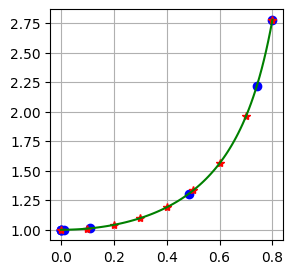

In [ ]:
# Grafica

plt.figure(figsize = [3, 3])
plt.plot(t1, y_aprox1, "bo")
plt.plot(t2, y_aprox2, "r*")
t3 = np.linspace(0, 0.8, 100)
plt.plot(t3, real(t3), "g")
plt.grid()

In [ ]:
# Metodo alterno
[t2, y_aprox2] = metRungeKutter4(f, 0, 0.8, 8, 1)
y_aprox = solve_ivp(f, [0, 0.8], [1], t_eval = t2)
t1 = y_aprox.t
print(t1, len(t1))
y_aprox1 = y_aprox.y[0]
error1 = np.linalg.norm(real(t1) - y_aprox1, 2)/(np.linalg.norm(real(t1), 2)) * 100
error2 = np.linalg.norm(real(t2) - y_aprox2, 2)/(np.linalg.norm(real(t2), 2)) * 100
print(error1, error2)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8] 9
0.04059245178467685 0.014344366224396105


## Solve_ivp Para Sistemas

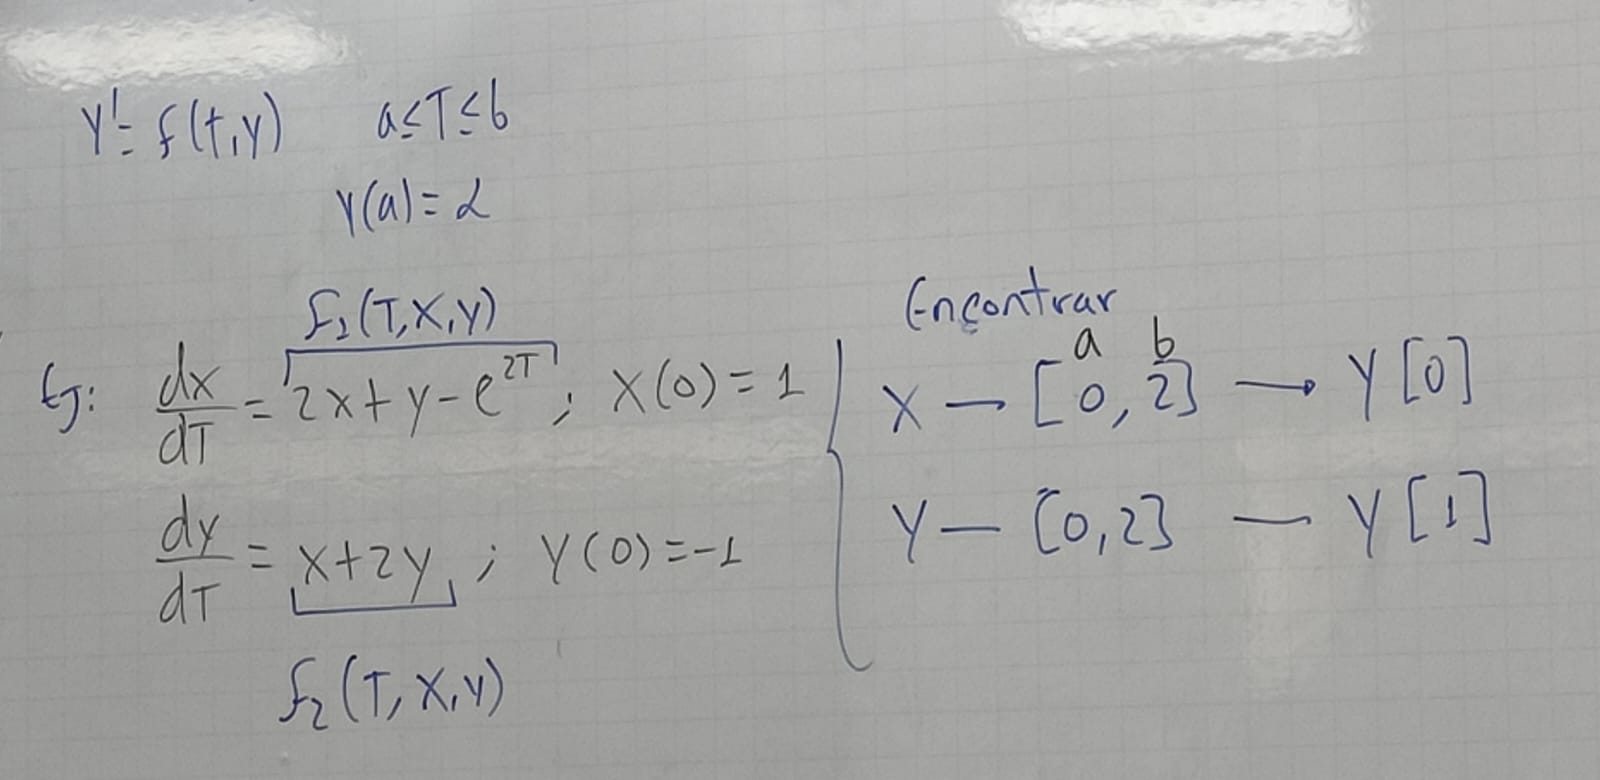

In [ ]:
Image("fSolveivp.jpg")

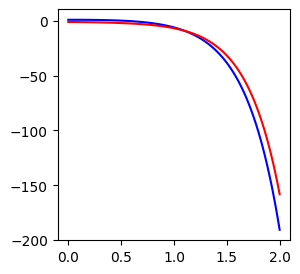

In [ ]:
def fSolveSist(t, y):
  f1 = 2 * y[0] + y[1] - np.exp(2 * t)
  f2 = y[0] + 2 * y[1]
  return [f1, f2]

t = np.linspace(0, 2, 100)
sist_aprox = solve_ivp(fSolveSist, [0, 2], [1, -1], t_eval = t)
# print(sist_aprox)
t1 = sist_aprox.t
[x_aprox, y_aprox] = [sist_aprox.y[0], sist_aprox.y[1]]
plt.figure(figsize = [3, 3])
plt.plot(t1, x_aprox, "b")
plt.plot(t1, y_aprox, "r")

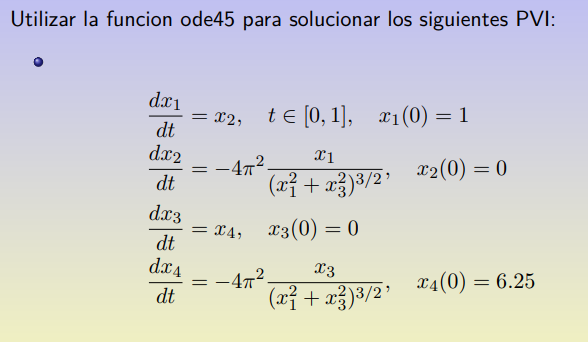

In [ ]:
Image("EjercicioIVP.png")

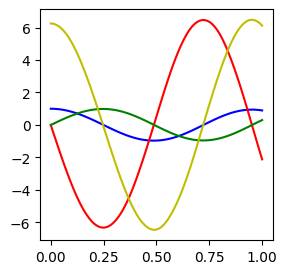

In [ ]:
# Ejercicio
def ejercicio(t, y):
  f1 = y[1]
  f2 = -4 * (np.pi ** 2) * (y[0] / ((y[0] ** 2 + y[2] ** 2) ** (3/2)))
  f3 = y[3]
  f4 = -4 * (np.pi ** 2) * (y[2] / ((y[0] ** 2 + y[2] ** 2) ** (3/2)))
  return [f1, f2, f3, f4]

t = np.linspace(0, 1, 100)
sist_aprox = solve_ivp(ejercicio, [0, 1], [1, 0, 0, 6.25], t_eval = t)
# print(sist_aprox)
t1 = sist_aprox.t
[x_aprox, y_aprox, w_aprox, z_aprox] = [sist_aprox.y[0], sist_aprox.y[1], sist_aprox.y[2], sist_aprox.y[3]]
plt.figure(figsize = [3, 3])
plt.plot(t1, x_aprox, "b")
plt.plot(t1, y_aprox, "r")
plt.plot(t1, w_aprox, "g")
plt.plot(t1, z_aprox, "y")
plt.show()

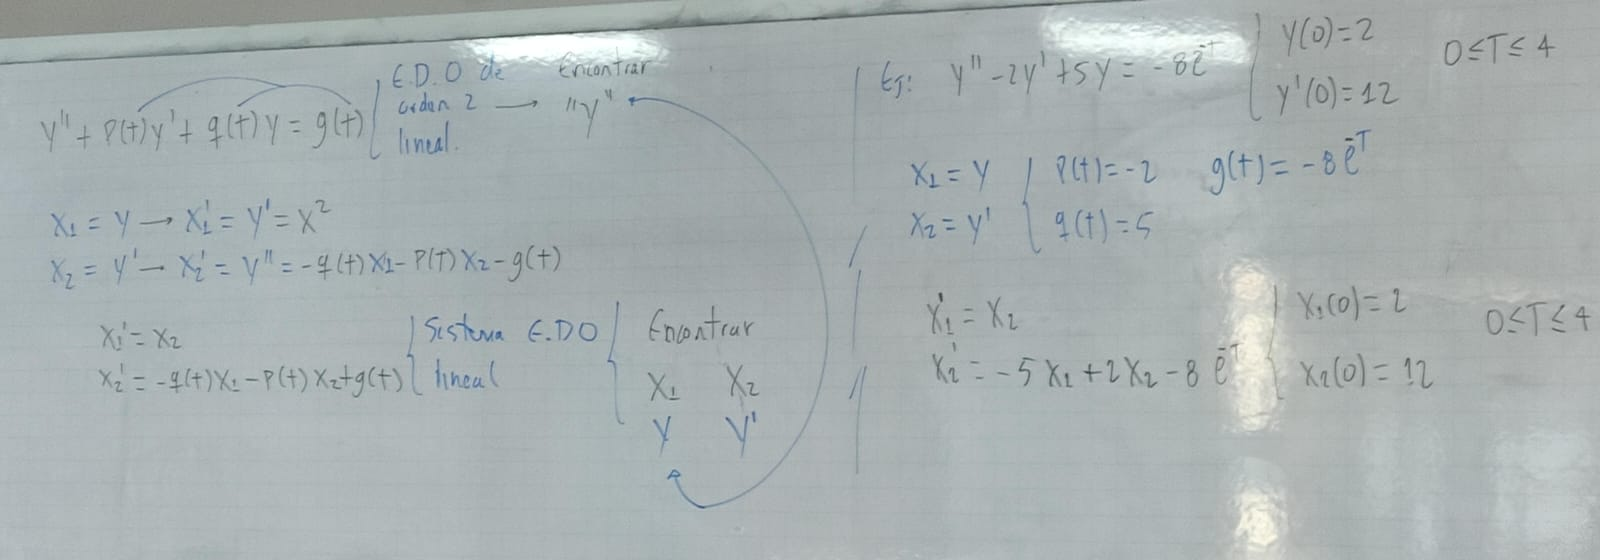

In [ ]:
Image("funcionSolvePY.jpg")

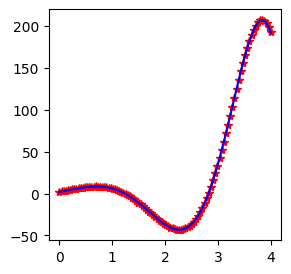

0.11837808822404772


In [ ]:
# Usando la funcion de python

def f(t, x):
  f1 = x[1]
  f2 = -5 * x[0] + 2 * x[1] - 8 * np.exp(-t)
  return [f1, f2]

t = np.linspace(0, 4, 100)
sist_aprox = solve_ivp(f, [0, 4], [2, 12], t_eval = t)
t1 = sist_aprox.t
x_aprox = sist_aprox.y[0]
plt.figure(figsize = [3, 3])
plt.plot(t1, x_aprox, 'r*')

def real(t):
  return 3 * np.exp(t) * np.cos(2 * t) + 4 * np.exp(t) * np.sin(2 * t) - np.exp(-t)
plt.plot(t1, real(t1), 'b')
plt.show()

errores = np.linalg.norm(real(t1) - x_aprox, 2)/(np.linalg.norm(real(t1), 2)) * 100
print(errores)

# Talleres

## Taller Diferienciacion Numerica

In [ ]:
# Punto 2

def f(x):
  return np.log10(x)

def fp(x):
  return 1/(x * np.log(10))

[atras, central, adelante] = derivada(f, 25, 0.001)
print("Hacia atras: ", atras, "\nCentral: ", central, "\nHacia adelante: ", adelante)
real = fp(25)
print("\nValor Real:", real)
difAt = error(real, atras)   # Calculo error
difCe = error(real, central)
difAd = error(real, adelante)
print("\nDiferencias: {0:.8f}, {1:.8f}, {2:.8f}".format(difAt, difCe, difAd))

Hacia atras:  0.017372126721149073 
Central:  0.017371779285402233 
Hacia adelante:  0.017371431849655394

Valor Real: 0.01737177927613007

Diferencias: 0.00200005, 0.00000005, 0.00199995


In [ ]:
# Punto 3

def f(x):
  return ((x ** 2) + 1) * np.e ** np.sin(x)

# Primera Derivada
def fp(x):
    return (2 * x * np.exp(np.sin(x))) + (np.exp(np.sin(x)) * np.cos(x) * (x ** 2 + 1))

# Segunda Derivada
def fpp(x):
    return np.exp(np.sin(x)) * ((4*x + (x**2 + 1)*(np.cos(x)**2 - np.sin(x))) + 2*np.cos(x))

# Calculo primera derivada
print("**Primera Derivada**")
[atras, central, adelante] = derivada(f, 0, 0.001)
print("Hacia atras: ", atras, "\nCentral: ", central, "\nHacia adelante: ", adelante)
real = fp(0)
print("Valor Real:", real)
difAt = error(real, atras)   # Calculo error
difCe = error(real, central)
difAd = error(real, adelante)
print("Diferencias: {0:.8f}, {1:.8f}, {2:.8f}".format(difAt, difCe, difAd))

# Calculo Segunda derivada
print("\n**Segunda Derivada**")
ap_at_at = segundaDerivada(f, 0, 0.001)
print("Hacia atras atras: ", ap_at_at)
real2 = fpp(0)
print("Valor Real:", real2)
dif = error(real2, ap_at_at)  # Calculo error
print("Diferencias: {0:.8f}".format(dif))

**Primera Derivada**
Hacia atras:  0.9985009996250627 
Central:  1.000000999999917 
Hacia adelante:  1.0015010003747715
Valor Real: 1.0
Diferencias: 0.14990004, 0.00010000, 0.15010004

**Segunda Derivada**
Hacia atras atras:  3.000000749708853
Valor Real: 3.0
Diferencias: 0.00002499


In [ ]:
# Punto 4

# a).
print("Punto A")

def f(x):
  return (x ** 3) + 4 * x - 15

def fp(x):
  return 3 * (x ** 2) + 4

# Primera Derivada
[atras, central, adelante] = derivada(f, 0, 0.25)
print("Hacia atras: ", atras, "\nCentral: ", central, "\nHacia adelante: ", adelante)
real = fp(0)
print("\nValor Real:", real)
difAt = error(real, atras)   # Calculo error
difCe = error(real, central)
difAd = error(real, adelante)
print("\nDiferencias: {0:.8f}, {1:.8f}, {2:.8f}".format(difAt, difCe, difAd))

# b).
print("\nPunto B")

def f(x):
  return np.tan(x/3)

def sec(x):
  return 1 / np.cos(x)

def fp(x):
  return (1/3) * (sec(x/3)) **2

# Primera Derivada
[atras, central, adelante] = derivada(f, 0.4, 0.1)
print("Hacia atras: ", atras, "\nCentral: ", central, "\nHacia adelante: ", adelante)
real = fp(0.4)
print("\nValor Real:", real)
difAt = error(real, atras)   # Calculo error
difCe = error(real, central)
difAd = error(real, adelante)
print("\nDiferencias: {0:.8f}, {1:.8f}, {2:.8f}".format(difAt, difCe, difAd))

# b).
print("\nPunto C")

def f(x):
  return (np.e ** x) + x

def fp(x):
  return (np.e ** x) + 1

# Primera Derivada
[atras, central, adelante] = derivada(f, 2, 0.2)
print("Hacia atras: ", atras, "\nCentral: ", central, "\nHacia adelante: ", adelante)
real = fp(2)
print("\nValor Real:", real)
difAt = error(real, atras)   # Calculo error
difCe = error(real, central)
difAd = error(real, adelante)
print("\nDiferencias: {0:.8f}, {1:.8f}, {2:.8f}".format(difAt, difCe, difAd))

Punto A
Hacia atras:  4.0625 
Central:  4.0625 
Hacia adelante:  4.0625

Valor Real: 4

Diferencias: 1.56250000, 1.56250000, 1.56250000

Punto B
Hacia atras:  0.33794444084282016 
Central:  0.33946273108395947 
Hacia adelante:  0.34098102132509883

Valor Real: 0.33933020660149116

Diferencias: 0.40838267, 0.03905473, 0.48649212

Punto C
Hacia atras:  7.697043172588516 
Central:  8.438415087552944 
Hacia adelante:  9.179787002517372

Valor Real: 8.389056098930649

Diferencias: 8.24899629, 0.58837357, 9.42574342


In [ ]:
Image("velocidad.png")

In [ ]:
Image("aceleracion.png")

In [ ]:
# Punto 5

t = np.array([0, 25, 50, 75, 100, 125])
s = np.array([0, 32, 58, 78, 92, 100])

# Cálculo de la velocidad
velocidad = np.zeros_like(t, dtype=float)
n = len(t)

# Diferencias hacia adelante para el primer punto
velocidad[0] = (s[1] - s[0]) / (t[1] - t[0])

# Diferencias centradas para los puntos intermedios
for i in range(1, n-1):
    velocidad[i] = (s[i+1] - s[i-1]) / (t[i+1] - t[i-1])

# Diferencias hacia atrás para el último punto
velocidad[-1] = (s[-1] - s[-2]) / (t[-1] - t[-2])

# Cálculo de la aceleración
aceleracion = np.zeros_like(t, dtype=float)

# Diferencias hacia adelante para el primer punto
aceleracion[0] = (s[2] - 2 * s[1] + s[0]) / ((t[1] - t[0]) ** 2)

# Diferencias centradas para los puntos intermedios
for i in range(1, n-1):
    aceleracion[i] = (s[i+1] - 2 * s[i] + s[i-1]) / ((t[i] - t[i-1]) ** 2)

# Diferencias hacia atrás para el último punto
aceleracion[-1] = (s[-1] - 2 * s[-2] + s[-3]) / ((t[-1] - t[-2]) ** 2)

# Resultados
print("Tiempo (s): ", t)
print("Distancia (km): ", s)
print("Velocidad (km/s): ", velocidad)
print("Aceleración (km/s^2): ", aceleracion)

Tiempo (s):  [  0  25  50  75 100 125]
Distancia (km):  [  0  32  58  78  92 100]
Velocidad (km/s):  [1.28 1.16 0.92 0.68 0.44 0.32]
Aceleración (km/s^2):  [-0.0096 -0.0096 -0.0096 -0.0096 -0.0096 -0.0096]


In [ ]:
# Punto 7

def obtener_datos():
  print("Ingrese los datos de x y f(x) separados por espacios.")
  x = list(map(float, input("x: ").strip().split()))
  fx = list(map(float, input("f(x): ").strip().split()))
  return np.array(x), np.array(fx)

def derivada_numerica(x, fx):
  n = len(x)
  derivada = np.zeros_like(x, dtype=float)

  # Diferencias hacia adelante para el primer punto
  derivada[0] = (fx[1] - fx[0]) / (x[1] - x[0])

  # Diferencias centradas para los puntos intermedios
  for i in range(1, n-1):
      derivada[i] = (fx[i+1] - fx[i-1]) / (x[i+1] - x[i-1])

  # Diferencias hacia atrás para el último punto
  derivada[-1] = (fx[-1] - fx[-2]) / (x[-1] - x[-2])

  return derivada

print("Programa para estimar la primera derivada de datos irregularmente espaciados.")
x, fx = obtener_datos()
derivada = derivada_numerica(x, fx)

print("\nResultados:")
print(" x      f(x)   f'(x)")
for i in range(len(x)):
  print(f"{x[i]:<7} {fx[i]:<7} {derivada[i]:<7}")

Programa para estimar la primera derivada de datos irregularmente espaciados.
Ingrese los datos de x y f(x) separados por espacios.


KeyboardInterrupt: Interrupted by user

Punto 7

$$
\text{Integral A =}\int_{0}^{\frac{\pi}{2}} (8 + 4\cos(x)) \, dx
$$

$$
\text{Integral B =}\int_{0}^{3} (1 - e^{-x}) \, dx
$$

$$
\text{Integral C =}\int_{0}^{3} x^2 e^x \, dx
$$

A. Evaluacion Analitica:

Integral A
$$
\int_{0}^{\frac{\pi}{2}} (8 + 4\cos(x)) \, dx = 8x + 4sen(x)
$$

$$
= 8(\frac{\pi}{2}) + 4sen(\frac{\pi}{2}) - (8(0) + 4sen(0))
$$

$$
= 16.56 - 0
$$

$$
= 16.56
$$

Integral B
$$
\int_{0}^{3} (1 - e^{-x}) \, dx = x + e^{-x}  
$$

$$
= ((3) + e^{-3}) - ((0) + e^{-0})
$$

$$
= 2.049
$$

Integral C
$$
\int_{0}^{3} x^2 e^x \, dx = x^{2}e^{x} - 2(e^{x}x - e^{x})
$$

$$
= (3^{2}e^{3} - 2(e^{3}3 - e^{3})) - (0^{2}e^{0} - 2(e^{0}0 - e^{0}))
$$

$$
= 98.42
$$

In [ ]:
# b) Con una sola aplicacion de la regla del trapecio

# Integral A
def fA(x):
  return (8 + 4 * np.cos(x))

def integralA(x):
  return ((8 * x) + 4 * np.sin(x))

aplicacionA = reglaTrapecio(fA, 0, np.pi/2, 1)
realA = integralA(np.pi/2) - integralA(0)
print(realA, aplicacionA, error(realA, aplicacionA))

# Integral B
def fB(x):
  return (1 - np.e ** x)

def integralB(x):
  return x + (np.e ** (-x))

aplicacionB = reglaTrapecio(fB, 0, 3, 1)
realB = integralB(3) - integralB(0)
print(realB, aplicacionB, error(realB, aplicacionB))

# Integral C
def fC(x):
  return (x ** 2) * (np.e ** x)

def integralC(x):
  return (x ** 2) * (np.e ** x) - 2 * ((np.e ** x) * x - np.e ** x)

aplicacionC = reglaTrapecio(fC, 0, 3, 1)
realC = integralC(3) - integralC(0)
print(realC, aplicacionC, error(realC, aplicacionC))

In [ ]:
# C) Con una sola palicacion de simpson

# Integral A
aplicacionBA = reglaSimpson(fA, 0, np.pi/2, 1)
print(realA, aplicacionBA)

# Integral B
aplicacionBB = reglaSimpson(fB, 0, 3, 1)
print(realB, aplicacionBB)

# Integral C
aplicacionBC = reglaSimpson(fC, 0, 3, 1)
print(realC, aplicacionBC)

In [ ]:
# d) Con multiple aplicacion para trapecio y simpson con n = 5
# b) Con una sola aplicacion de la regla del trapecio

# Integral A
aplicacionTA = reglaTrapecio(fA, 0, np.pi/2, 5)
aplicacionSA = reglaSimpson(fA, 0, np.pi/2, 5)
print(realA, aplicacionTA, aplicacionSA)

# Integral B
aplicacionTB = reglaTrapecio(fB, 0, 3, 5)
aplicacionSB = reglaSimpson(fA, 0, 3, 5)
print(realB, aplicacionTB, aplicacionSB)

# Integral C
aplicacionTC = reglaTrapecio(fC, 0, 3, 5)
aplicacionSC = reglaSimpson(fA, 0, np.pi/2, 5)
print(realC, aplicacionTC, aplicacionSC)

In [ ]:
# Punto 8
x = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5])
y = np.array([1, 8, 4, 3.5, 5, 1])

# a). Regla Trapecio
print(trapecio_tabla(x, y))

# B). Regla Simpson
print(simpson_tabla(x, y))

In [ ]:
# Punto 9
x = np.array([-2, 0, 2, 4, 6, 8])
y = np.array([35, 5, -10, 2, 5, 3])

# a). Regla Trapecio
print(trapecio_tabla(x, y))

# B). Regla Simpson
print(simpson_tabla(x, y))

In [ ]:
# Punto 13

def Q(t):
    return 9 + 4 * np.cos(0.4 * t) ** 2

def c(t):
    return 5 * np.exp(-0.5 * t) + 2 * np.exp(0.15 * t)

# Calcular la masa transportada usando la regla de Simpson
# M = reglaTrapecio(Q(t) * c(t), 2, 8, 100)  # Erro, verificar luego
M = round(Q(8) * c(8) - Q(2) * c(2), 2)
print("Masa transportada", M, "mg")

## Taller ED

In [ ]:
# Punto 1 Aplicacion Metodo Euler, RK2 y RK4

# a).
def f(t, y):
  return t * np.e ** (3 * t) - 2 * y

def real(t):
  return (1/5) * t * np.e ** (3 * t) - (1/25) * np.e ** (3 * t) + (1/25) * np.e ** (-2 * t)

n = 20
[t1, y_aprox1] = metEuler(f, 0, 1, n, 0)
[t2, y_aprox2] = metRungeKutter2(f, 0, 1, n, 0)
[t3, y_aprox3] = metRungeKutter4(f, 0, 1, n, 0)
error_1 = np.linalg.norm(real(t1) - y_aprox1, 2)/(np.linalg.norm(real(t1), 2)) * 100
error_2 = np.linalg.norm(real(t2) - y_aprox2, 2)/(np.linalg.norm(real(t2), 2)) * 100
error_3 = np.linalg.norm(real(t3) - y_aprox3, 2)/(np.linalg.norm(real(t3), 2)) * 100
# print("Aproximacion Euler: ", y_aprox1, "\nAproximacion RK2: ", y_aprox2, "\nAproximacion RK4: ", y_aprox3)
print(error_1, error_2, error_3)

In [ ]:
# b).
def f(t, y):
  return 1 + ((t - y) ** 2)

def real(t):
  return t + 1/(1 - t)

n = 20
[t1, y_aprox1] = metEuler(f, 2, 3, n, 1)
[t2, y_aprox2] = metRungeKutter2(f, 2, 3, n, 1)
[t3, y_aprox3] = metRungeKutter4(f, 2, 3, n, 1)
error_1 = np.linalg.norm(real(t1) - y_aprox1, 2)/(np.linalg.norm(real(t1), 2)) * 100
error_2 = np.linalg.norm(real(t2) - y_aprox2, 2)/(np.linalg.norm(real(t2), 2)) * 100
error_3 = np.linalg.norm(real(t3) - y_aprox3, 2)/(np.linalg.norm(real(t3), 2)) * 100
# print("Aproximacion Euler: ", y_aprox1, "\nAproximacion RK2: ", y_aprox2, "\nAproximacion RK4: ", y_aprox3)
print(error_1, error_2, error_3)

In [ ]:
# c).
def f(t, y):
  return 1 + (y/t)

def real(t):
  return t * np.log10(t) + 2 * t

n = 20
[t1, y_aprox1] = metEuler(f, 1, 2, n, 2)
[t2, y_aprox2] = metRungeKutter2(f, 1, 2, n, 2)
[t3, y_aprox3] = metRungeKutter4(f, 1, 2, n, 2)
error_1 = np.linalg.norm(real(t1) - y_aprox1, 2)/(np.linalg.norm(real(t1), 2)) * 100
error_2 = np.linalg.norm(real(t2) - y_aprox2, 2)/(np.linalg.norm(real(t2), 2)) * 100
error_3 = np.linalg.norm(real(t3) - y_aprox3, 2)/(np.linalg.norm(real(t3), 2)) * 100
# print("Aproximacion Euler: ", y_aprox1, "\nAproximacion RK2: ", y_aprox2, "\nAproximacion RK4: ", y_aprox3)
print(error_1, error_2, error_3)

In [ ]:
# d).
def f(t, y):
  return np.cos(2 * t) + np.sin(3 * t)

def real(t):
  return (1/2) * np.sin(2 * t) - (1/3) * np.cos(3 * t) + (4/3)

n = 20
[t1, y_aprox1] = metEuler(f, 0, 1, n, 1)
[t2, y_aprox2] = metRungeKutter2(f, 0, 1, n, 1)
[t3, y_aprox3] = metRungeKutter4(f, 0, 1, n, 1)
error_1 = np.linalg.norm(real(t1) - y_aprox1, 2)/(np.linalg.norm(real(t1), 2)) * 100
error_2 = np.linalg.norm(real(t2) - y_aprox2, 2)/(np.linalg.norm(real(t2), 2)) * 100
error_3 = np.linalg.norm(real(t3) - y_aprox3, 2)/(np.linalg.norm(real(t3), 2)) * 100
# print("Aproximacion Euler: ", y_aprox1, "\nAproximacion RK2: ", y_aprox2, "\nAproximacion RK4: ", y_aprox3)
print(error_1, error_2, error_3)

In [ ]:
# e).
def f(t, y):
  return (t ** -2) * (np.sin(2 * t - 2 * t * y))

def real(t):
  return (1/2) * (t ** -2) * (4 + np.cos(2) - np.cos(2 * t))

n = 20
[t1, y_aprox1] = metEuler(f, 1, 2, n, 2)
[t2, y_aprox2] = metRungeKutter2(f, 1, 2, n, 2)
[t3, y_aprox3] = metRungeKutter4(f, 1, 2, n, 2)
error_1 = np.linalg.norm(real(t1) - y_aprox1, 2)/(np.linalg.norm(real(t1), 2)) * 100
error_2 = np.linalg.norm(real(t2) - y_aprox2, 2)/(np.linalg.norm(real(t2), 2)) * 100
error_3 = np.linalg.norm(real(t3) - y_aprox3, 2)/(np.linalg.norm(real(t3), 2)) * 100
# print("Aproximacion Euler: ", y_aprox1, "\nAproximacion RK2: ", y_aprox2, "\nAproximacion RK4: ", y_aprox3)
print(error_1, error_2, error_3)

In [ ]:
# Punto 2
from scipy.integrate import odeint

def sistema(yv, t):
  y, v = yv
  dydt = v
  dvdt = -9 * y
  return [dydt, dvdt]

# Condiciones iniciales
y0 = 1
v0 = 6
yv0 = [y0, v0]

# Vector de tiempo
t = np.linspace(0, 2*np.pi, 100)

# Resolver el sistema de ecuaciones diferenciales
solucion = odeint(sistema, yv0, t)
y = solucion[:, 0]

# Solución exacta
y_exacta = 2 * np.sin(3 * t) + np.cos(3 * t)

# Graficar las soluciones
plt.plot(t, y, 'b-', label='Solución aproximada')
plt.plot(t, y_exacta, 'r--', label='Solución exacta')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Comparación entre solución aproximada y exacta')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Punto 3

# Coeficientes y condiciones iniciales
m = 0.11  # kg
g = 9.8   # m/s^2
k = 0.002 # kg/m
v0 = 8    # m/s
t0 = 0    # s
tf = 10   # s
n = 1000  # número de pasos

# Función que describe la ecuación diferencial
def dv_dt(v):
    return (-m * g - k * v * np.abs(v)) / m

# Método de Euler para resolver la ecuación diferencial
def euler_method(dv_dt, v0, t0, tf, n):
    dt = (tf - t0) / n
    t = np.linspace(t0, tf, n+1)
    v = np.zeros(n+1)
    v[0] = v0
    for i in range(1, n+1):
        v[i] = v[i-1] + dt * dv_dt(v[i-1])
    return t, v

# Resolver la ecuación diferencial
t, v = euler_method(dv_dt, v0, t0, tf, n)

# Encontrar el índice donde la velocidad cambia de positiva a negativa
idx_max_altura = np.where(np.diff(np.sign(v)))[0][0]

# Calcular el tiempo y la altura máxima
tiempo_max_altura = t[idx_max_altura]
altura_maxima = v[idx_max_altura]

print(f"La altura máxima se alcanza a los {tiempo_max_altura:.1f} segundos.")